## Домашнее задание Numpy Neural Net Exploration (50 баллов)

В этом домашнем задании требуется провести набор экспериментов с нейронной сетью. Для проведения экспериментов нужно доработать представленный фреймворк для обучения нейронной сети на Numpy в проекте **Numpy_NN** c **hinge_loss** функцией ошибки. 


Все необходимые доработки обозначены в проекте `Numpy_NN` тегом **TODO**.

В ноутбуке только сами эксперименты с помощью данных команд - все доработки делать внутри фреймворка.

In [2]:
import glob
import pickle
import numpy as np
import sys
import os
import importlib
from sklearn.metrics import classification_report

In [3]:
# Пример импорта модуля
import os
import sys
sys.path.append(os.path.join(os.getcwd(), "Numpy_NN/src"))

from nn.module import sequential

# пример быстрой перезагрузки модуля без рестарта ноутбука
import importlib
importlib.reload(sequential)


<module 'nn.module.sequential' from '/Users/muradgamzatov/Desktop/dl_sbt/Numpy Network/Numpy_NN/src/nn/module/sequential.py'>

Вам нужно провести набор экспериментов с CIFAR датасетом и исследовать поведение нейронной сети на этом датасете при разных архитектурах. Пример 1ого эксперимента можно найти в ноутбуке ``Numpy Network/Numpy_NN/test_CIFAR_training.ipynb``

Ваши эксперименты должы быть логичны - старайтесь последовательно строить архитектуру и попытайтесь к концу эксприментов определить комбинацию компонент нейронной сети для лучшего качества. Также же вы можете расширять количеcтво экспериментов, подтверждая это соответсвующими выводами. 

В каждом эксперименте должен быть:
    
    * Процесс обучения нейронной сети с помощью training.train.train
    * Проверка градиента для каждой архитектуры нейронной сети с помощью utils.gradient_check(если это указано в описании эксперимента)
    * Визуализация обучения - воспользоваться методом visualization_utils.plot_learning_curves
    * Рассчет точности общей точности модели и рассчет по классовой точности с помощью sklearn.metrics.classification_report
    * Ваш вывод по результату эксперимента
    
В каждом эксперименте должен быть каждый пункт иначе эксперимент не оценивается. Каждый эксперимент оценивается в **4 балла**. За расширение пространства экспериментов и реализации своих идей можно дополнительно получить до **6 баллов**.

В данном ДЗ оценивается качество работы доработанного вами фреймворка, качество проведения эксперимента и полученный результат. 

In [4]:
from nn.layers.linear import Linear
from nn.activations.relu import ReLU
from optimization.gd_optimizer import GD
from nn.module.sequential import Sequential
from nn.loss_functions import hinge_loss
import visualization_utils as viz_utils
from dataset import dataloader
from utils import gradient_check
from dataset.dataloader import Dataloader

In [5]:
importlib.reload(dataloader)
importlib.reload(hinge_loss)

<module 'nn.loss_functions.hinge_loss' from '/Users/muradgamzatov/Desktop/dl_sbt/Numpy Network/Numpy_NN/src/nn/loss_functions/hinge_loss.py'>

In [6]:
files = glob.glob("cifar-10-batches-py/**")
files = [item.split('/')[-1] for item in files]
for file in sorted(files):
    print(f"-{file}")

-batches.meta
-data_batch_1
-data_batch_2
-data_batch_3
-data_batch_4
-data_batch_5
-readme.html
-test_batch


In [7]:
with open("cifar-10-batches-py/data_batch_1", "rb") as f:
    train_dataset_1 = pickle.load(f, encoding="bytes")
    
with open("cifar-10-batches-py/data_batch_2", "rb") as f:
    train_dataset_2 = pickle.load(f, encoding="bytes")

with open("cifar-10-batches-py/data_batch_3", "rb") as f:
    train_dataset_3 = pickle.load(f, encoding="bytes")

with open("cifar-10-batches-py/data_batch_4", "rb") as f:
    train_dataset_4 = pickle.load(f, encoding="bytes")

with open("cifar-10-batches-py/data_batch_5", "rb") as f:
    train_dataset_5 = pickle.load(f, encoding="bytes")

In [8]:
datasets = [train_dataset_1, train_dataset_2, train_dataset_3, 
            train_dataset_4, train_dataset_5]

labels = list(range(10))

In [9]:
train_dataset = []

for dataset in datasets:
    for vec, label in zip(dataset[b'data'], dataset[b'labels']):
        train_dataset.append((vec / 256, label))

In [10]:
np.random.seed(42)
np.random.shuffle(train_dataset)

train_data = []
valid_data = []

cnt = {ind: 0 for ind in range(10)}

for vec, label in train_dataset:
    if cnt[label] < 1000:
        cnt[label] += 1
        valid_data.append((vec, label))
    else:
        train_data.append((vec, label))

In [11]:
with open("cifar-10-batches-py/test_batch", "rb") as f:
    test_dataset = pickle.load(f, encoding="bytes")

test_data = []
for vec, label in zip(test_dataset[b'data'], test_dataset[b'labels']):
    test_data.append((vec / 256, label))

In [12]:
print("|=====|{}|{}|{}|{}|".format("=" * 6, "=" * 6, "=" * 6, "=" * 6))
print("|Label|{0:^{1}}|{2:^{3}}|{4:^{5}}|{6:^{7}}|".format(
    "Train", 6, "Valid", 6, "Test", 6, "Sum", 6))
print("|=====|{}|{}|{}|{}|".format("=" * 6, "=" * 6, "=" * 6, "=" * 6))

labels = list(range(10))
for label in labels:
    print("|{0:^{1}}|".format(label, 5), end='')
    label_num = 0
    for dataset in (train_data, valid_data, test_data):
        labels_data = [item[1] for item in dataset]
        print("{0:^{1}}|".format(labels_data.count(label), 6), end='')
        label_num += labels_data.count(label)
    print("{0:^{1}}|".format(label_num, 6))

print("|=====|{}|{}|{}|{}|".format("=" * 6, "=" * 6, "=" * 6, "=" * 6))

|=====|======|======|======|======|
|Label|Train |Valid | Test | Sum  |
|=====|======|======|======|======|
|  0  | 4000 | 1000 | 1000 | 6000 |
|  1  | 4000 | 1000 | 1000 | 6000 |
|  2  | 4000 | 1000 | 1000 | 6000 |
|  3  | 4000 | 1000 | 1000 | 6000 |
|  4  | 4000 | 1000 | 1000 | 6000 |
|  5  | 4000 | 1000 | 1000 | 6000 |
|  6  | 4000 | 1000 | 1000 | 6000 |
|  7  | 4000 | 1000 | 1000 | 6000 |
|  8  | 4000 | 1000 | 1000 | 6000 |
|  9  | 4000 | 1000 | 1000 | 6000 |
|=====|======|======|======|======|


In [13]:
train_matrix = np.array([item[0] for item in train_data])
D = np.var(train_matrix, axis=0)
E = np.mean(train_matrix, axis=0)

for ind in range(len(train_data)):
    train_data[ind] = (train_data[ind][0] - E, train_data[ind][1])
    train_data[ind] = (train_data[ind][0] / np.sqrt(D), train_data[ind][1])

for ind in range(len(valid_data)):
    valid_data[ind] = (valid_data[ind][0] - E, valid_data[ind][1])
    valid_data[ind] = (valid_data[ind][0] / np.sqrt(D), valid_data[ind][1])

for ind in range(len(test_data)):
    test_data[ind] = (test_data[ind][0] - E, test_data[ind][1])
    test_data[ind] = (test_data[ind][0] / np.sqrt(D), test_data[ind][1])

In [14]:
from nn.layers import linear
importlib.reload(linear)
from nn.layers.linear import Linear

### Эксперимент 1 Построение нейронной сети с ReLU функцией активации

Реализуйте эксперимент, доработав соответсвующие модули Numpy_NN фреймворка. Количество слоев, функций на ваше усмотрение. Можно добавлять любые другие функции активации на ваше усмотрение, но указанная в эксперименте функция должна быть обязательно. Перед обучением проверьте с помощью utils.gradient_check градиент вашей модели.  

Проведем проверку градиента

In [15]:
importlib.reload(dataloader)
from dataset.dataloader import Dataloader

In [15]:
np.random.seed(42)
gr_check = Sequential(
    Linear(3072, 128),
    ReLU(),
    Linear(128, 16),
    ReLU(),
    Linear(16, 10)
)
gr_check

Sequential(
	Linear(3072, 128, bias=True),
	ReLU(),
	Linear(128, 16, bias=True),
	ReLU(),
	Linear(16, 10, bias=True)
)

In [16]:
X, y = Dataloader(train_data, batch_size=2).__next__()
gradient_check(X, y, gr_check)

Backprop is correct!                                                                       
Backprop is correct!                                                              
Backprop is correct!                                                          
Backprop is correct!                                                                
Backprop is correct!                                                            
Backprop is correct!                                                          
Backprop is correct!                                                              
Backprop is correct!                                                            


2.919335737324909e-10

In [119]:
np.random.seed(42)
model1 = Sequential(
    Linear(3072, 768),
    ReLU(),
    Linear(768, 128),
    ReLU(),
    Linear(128, 10)
)
model

Sequential(
	Linear(3072, 768, bias=True),
	Sigmoid(),
	Linear(768, 128, bias=True),
	Sigmoid(),
	Linear(128, 10, bias=True)
)

In [16]:
from nn.activations import relu
importlib.reload(relu)
from nn.activations.relu import ReLU

In [17]:
from nn.layers import linear
importlib.reload(linear)
from nn.layers.linear import Linear

In [18]:
from training import train
importlib.reload(train)
from training.train import train

In [120]:
train_loss_history, valid_loss_history, \
train_acc_history, valid_acc_history = train(
    dataset=train_data, 
    model=model1, 
    epochs=10,
    lr=0.01,
    valid_dataset=valid_data,
    batch_size=10000,
    optim_method="GD")

|Epoch|Train loss|Train acc|Valid loss|Valid acc|  Grad/W  | Time, s  | Total, s |
|=====|==========|=========|==========|=========|==========|==========|==========|
| 1/10|  1.5590  | 0.1493  |  1.3663  | 0.1500  | 0.059944 |   13.2   |   13.2   |
| 2/10|  1.3354  | 0.1857  |  1.3006  | 0.1846  | 0.023545 |   15.0   |   28.2   |
| 3/10|  1.2836  | 0.2087  |  1.2678  | 0.2077  | 0.015202 |   9.1    |   37.4   |
| 4/10|  1.2546  | 0.2252  |  1.2455  | 0.2245  | 0.011809 |   9.1    |   46.5   |
| 5/10|  1.2338  | 0.2385  |  1.2284  | 0.2375  | 0.011912 |   10.7   |   57.3   |
| 6/10|  1.2176  | 0.2510  |  1.2147  | 0.2481  | 0.008521 |   12.3   |   69.5   |
| 7/10|  1.2043  | 0.2605  |  1.2033  | 0.2559  | 0.008866 |   11.1   |   80.6   |
| 8/10|  1.1931  | 0.2703  |  1.1936  | 0.2609  | 0.007816 |   9.3    |   89.8   |
| 9/10|  1.1833  | 0.2775  |  1.1852  | 0.2665  | 0.007360 |   9.4    |   99.3   |
|10/10|  1.1746  | 0.2850  |  1.1777  | 0.2741  | 0.006789 |   9.6    |  108.8   |


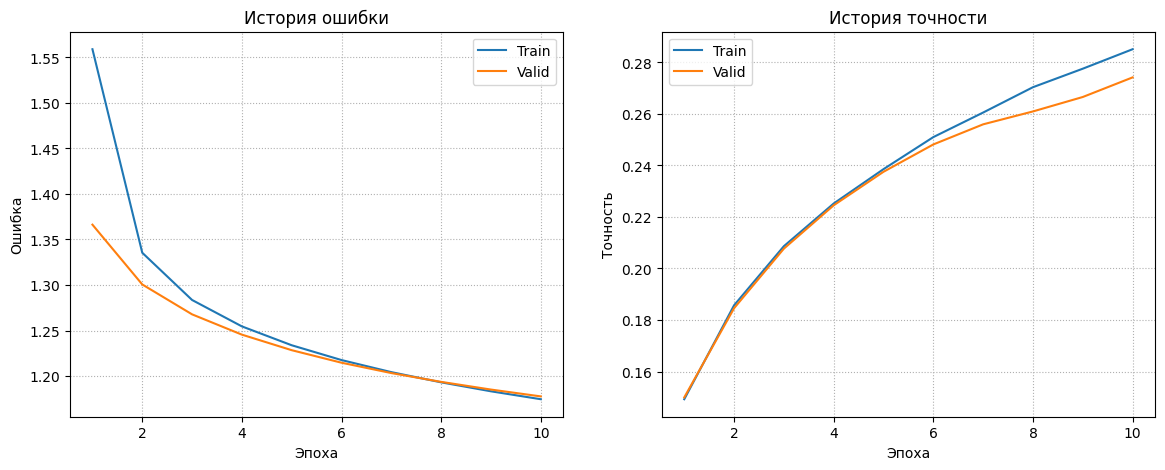

In [121]:
viz_utils.plot_learning_curves(train_loss_history, valid_loss_history,
                                train_acc_history, valid_acc_history)

In [122]:
test_dataloader = Dataloader(test_data, len(test_data), False)
model1.eval()
for vecs, labels in test_dataloader:
    out = model1.forward(vecs)

    loss = hinge_loss(out, labels)
    test_loss = loss.item()

    pred_labels = np.argmax(out.array, axis=-1)
    test_acc = np.sum(pred_labels == labels) / len(labels)

print(f"Ошибка на тесте: {test_loss:.4f}")
print(f"Точность на тесте: {test_acc:.4f}")

Ошибка на тесте: 1.1766
Точность на тесте: 0.2766


In [123]:
print(classification_report(labels, pred_labels))

              precision    recall  f1-score   support

           0       0.39      0.43      0.41      1000
           1       0.27      0.27      0.27      1000
           2       0.20      0.16      0.18      1000
           3       0.18      0.17      0.17      1000
           4       0.23      0.20      0.21      1000
           5       0.25      0.29      0.27      1000
           6       0.26      0.25      0.26      1000
           7       0.23      0.20      0.22      1000
           8       0.40      0.47      0.43      1000
           9       0.28      0.32      0.30      1000

    accuracy                           0.28     10000
   macro avg       0.27      0.28      0.27     10000
weighted avg       0.27      0.28      0.27     10000



#### Conclusion
Проверка градиента дала положительный результат.

Точность предсказания на тестовой выборке 0.2766, что вроде как неплохо

По графикам видно, что модель обучилась адекватно. Поведение loss и accuracy на тренировочной и валидационной выборке одинаково

Присутствует разброс по метрике f1, что может говорить о разной способности различать определенные классы

### Эксперимент 2 Построение нейронной сети с Sigmoid функцией активации

Реализуйте эксперимент, доработав соответсвующие модули Numpy_NN фреймворка. Количество слоев, функций на ваше усмотрение. Можно добавлять любые другие функции активации на ваше усмотрение, но указанная в эксперименте функция должна быть обязательно. Перед обучением проверьте с помощью utils.gradient_check градиент вашей модели.    

Проведем проверку градиента

In [19]:
from nn.activations import sigmoid
importlib.reload(sigmoid)
from nn.activations.sigmoid import Sigmoid

In [42]:
np.random.seed(42)
gr_check = Sequential(
    Linear(3072, 128),
    Sigmoid(),
    Linear(128, 16),
    Sigmoid(),
    Linear(16, 10)
)
gr_check

Sequential(
	Linear(3072, 128, bias=True),
	Sigmoid(),
	Linear(128, 16, bias=True),
	Sigmoid(),
	Linear(16, 10, bias=True)
)

In [46]:
import utils
importlib.reload(utils)
from utils import gradient_check

In [47]:
X, y = Dataloader(train_data, batch_size=2).__next__()
gradient_check(X, y, gr_check)

Backprop is correct!                                                                       


6.143381459375125e-10

In [114]:
np.random.seed(42)
model = Sequential(
    Linear(3072, 768),
    Sigmoid(),
    Linear(768, 128),
    Sigmoid(),
    Linear(128, 10)
)
model

Sequential(
	Linear(3072, 768, bias=True),
	Sigmoid(),
	Linear(768, 128, bias=True),
	Sigmoid(),
	Linear(128, 10, bias=True)
)

In [115]:
train_loss_history, valid_loss_history, \
train_acc_history, valid_acc_history = train(
    dataset=train_data, 
    model=model, 
    epochs=10,
    lr=0.01,
    valid_dataset=valid_data,
    batch_size=10000,
    optim_method="GD")

|Epoch|Train loss|Train acc|Valid loss|Valid acc|  Grad/W  | Time, s  | Total, s |
|=====|==========|=========|==========|=========|==========|==========|==========|
| 1/10|  1.6101  | 0.1047  |  1.2674  | 0.1068  | 0.107159 |   15.2   |   15.2   |
| 2/10|  1.2222  | 0.0970  |  1.1499  | 0.1019  | 0.070824 |   13.4   |   28.5   |
| 3/10|  1.1238  | 0.1467  |  1.0875  | 0.1473  | 0.040158 |   11.9   |   40.4   |
| 4/10|  1.0775  | 0.1520  |  1.0627  | 0.1543  | 0.029788 |   11.6   |   52.0   |
| 5/10|  1.0554  | 0.1552  |  1.0500  | 0.1591  | 0.026572 |   19.7   |   71.6   |
| 6/10|  1.0490  | 0.1613  |  1.0468  | 0.1628  | 0.025440 |   12.4   |   84.0   |
| 7/10|  1.0467  | 0.1669  |  1.0455  | 0.1677  | 0.028469 |   10.8   |   94.8   |
| 8/10|  1.0454  | 0.1711  |  1.0444  | 0.1726  | 0.028302 |   11.4   |  106.2   |
| 9/10|  1.0448  | 0.1794  |  1.0437  | 0.1800  | 0.030342 |   10.6   |  116.7   |
|10/10|  1.0434  | 0.1810  |  1.0404  | 0.1821  | 0.026429 |   10.6   |  127.4   |


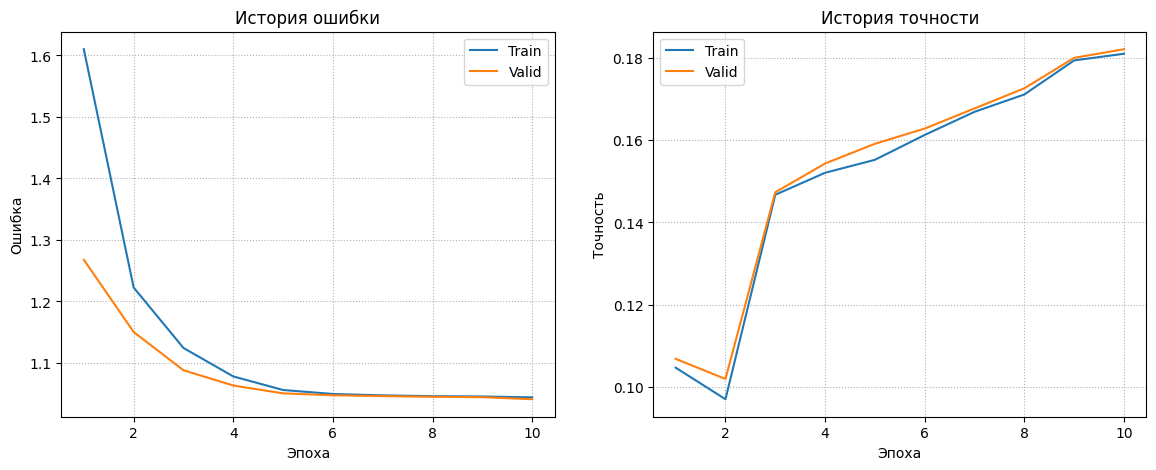

In [116]:
viz_utils.plot_learning_curves(train_loss_history, valid_loss_history,
                                train_acc_history, valid_acc_history)

In [20]:
from nn.loss_functions.hinge_loss import hinge_loss

In [117]:
test_dataloader = Dataloader(test_data, len(test_data), False)
model.eval()
for vecs, labels in test_dataloader:
    out = model.forward(vecs)

    loss = hinge_loss(out, labels)
    test_loss = loss.item()

    pred_labels = np.argmax(out.array, axis=-1)
    test_acc = np.sum(pred_labels == labels) / len(labels)

print(f"Ошибка на тесте: {test_loss:.4f}")
print(f"Точность на тесте: {test_acc:.4f}")

Ошибка на тесте: 1.0405
Точность на тесте: 0.1788


In [118]:
print(classification_report(labels, pred_labels))

              precision    recall  f1-score   support

           0       0.18      0.14      0.16      1000
           1       0.16      0.27      0.20      1000
           2       0.15      0.10      0.12      1000
           3       0.12      0.03      0.05      1000
           4       0.19      0.08      0.11      1000
           5       0.15      0.25      0.19      1000
           6       0.18      0.17      0.17      1000
           7       0.14      0.23      0.17      1000
           8       0.29      0.42      0.34      1000
           9       0.19      0.10      0.13      1000

    accuracy                           0.18     10000
   macro avg       0.18      0.18      0.17     10000
weighted avg       0.18      0.18      0.17     10000



#### Conclusion
Проверка градиента дала положительный результат.

Точность предсказания на тестовой выборке 0.1788, что заметно хуже ReLU, так еще и сложнее вычисляется

По графикам видно, что модель обучилась адекватно. Поведение loss и accuracy на тренировочной и валидационной выборке одинаково

Присутствует сильный разброс по метрике f1, что может говорить о разной способности различать определенные классы

### Эксперимент 3 Построение нейронной сети с TanH функцией активации

Реализуйте эксперимент, доработав соответсвующие модули Numpy_NN фреймворка. Количество слоев, функций на ваше усмотрение. Можно добавлять любые другие функции активации на ваше усмотрение, но указанная в эксперименте функция должна быть обязательно. Перед обучением проверьте с помощью utils.gradient_check градиент вашей модели.   

Проверим градиенты модели

In [21]:
from nn.activations.tanh import Tanh

In [59]:
np.random.seed(42)
gr_check = Sequential(
    Linear(3072, 128),
    Tanh(),
    Linear(128, 16),
    Tanh(),
    Linear(16, 10)
)
gr_check

Sequential(
	Linear(3072, 128, bias=True),
	Tanh(),
	Linear(128, 16, bias=True),
	Tanh(),
	Linear(16, 10, bias=True)
)

In [60]:
X, y = Dataloader(train_data, batch_size=2).__next__()
gradient_check(X, y, gr_check)

Backprop is correct!                                                                        


6.143381586608717e-10

In [109]:
np.random.seed(42)
model = Sequential(
    Linear(3072, 768),
    Tanh(),
    Linear(768, 128),
    Tanh(),
    Linear(128, 10)
)
model

Sequential(
	Linear(3072, 768, bias=True),
	Tanh(),
	Linear(768, 128, bias=True),
	Tanh(),
	Linear(128, 10, bias=True)
)

In [110]:
train_loss_history, valid_loss_history, \
train_acc_history, valid_acc_history = train(
    dataset=train_data, 
    model=model, 
    epochs=10,
    lr=0.01,
    valid_dataset=valid_data,
    batch_size=10000,
    optim_method="GD")

|Epoch|Train loss|Train acc|Valid loss|Valid acc|  Grad/W  | Time, s  | Total, s |
|=====|==========|=========|==========|=========|==========|==========|==========|
| 1/10|  1.5128  | 0.1911  |  1.3888  | 0.1947  | 0.116762 |   19.1   |   19.1   |
| 2/10|  1.3663  | 0.2211  |  1.3282  | 0.2204  | 0.060386 |   17.2   |   36.3   |
| 3/10|  1.3167  | 0.2419  |  1.2954  | 0.2405  | 0.039899 |   13.3   |   49.6   |
| 4/10|  1.2877  | 0.2522  |  1.2736  | 0.2505  | 0.029833 |   13.7   |   63.3   |
| 5/10|  1.2671  | 0.2622  |  1.2578  | 0.2579  | 0.020915 |   17.6   |   80.9   |
| 6/10|  1.2515  | 0.2704  |  1.2447  | 0.2659  | 0.019815 |   17.3   |   98.1   |
| 7/10|  1.2382  | 0.2754  |  1.2334  | 0.2688  | 0.013932 |   13.7   |  111.9   |
| 8/10|  1.2273  | 0.2835  |  1.2244  | 0.2755  | 0.015201 |   17.1   |  129.0   |
| 9/10|  1.2176  | 0.2891  |  1.2162  | 0.2810  | 0.011393 |   21.8   |  150.7   |
|10/10|  1.2090  | 0.2936  |  1.2088  | 0.2861  | 0.010453 |   17.8   |  168.5   |


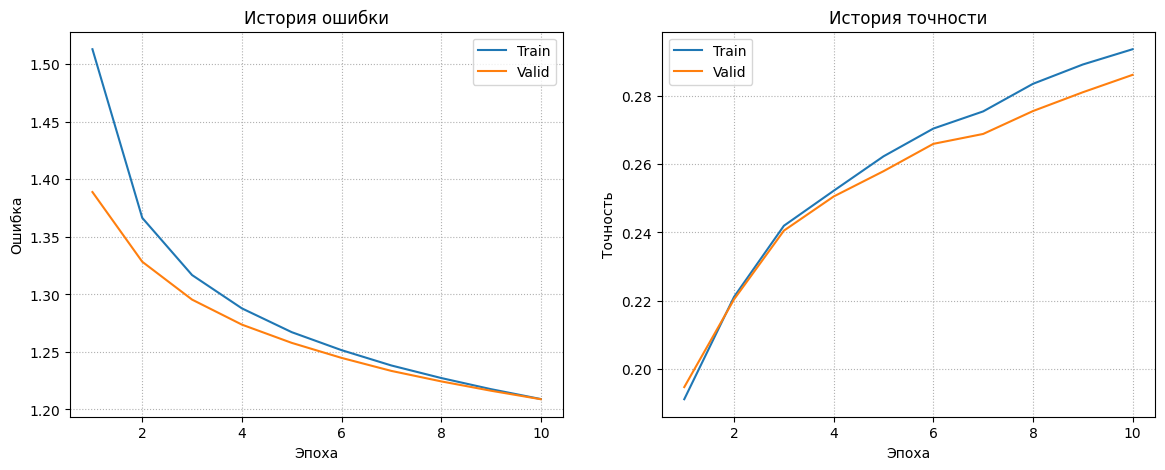

In [111]:
viz_utils.plot_learning_curves(train_loss_history, valid_loss_history,
                                train_acc_history, valid_acc_history)

In [112]:
test_dataloader = Dataloader(test_data, len(test_data), False)
model.eval()
for vecs, labels in test_dataloader:
    out = model.forward(vecs)

    loss = hinge_loss(out, labels)
    test_loss = loss.item()

    pred_labels = np.argmax(out.array, axis=-1)
    test_acc = np.sum(pred_labels == labels) / len(labels)

print(f"Ошибка на тесте: {test_loss:.4f}")
print(f"Точность на тесте: {test_acc:.4f}")

Ошибка на тесте: 1.2127
Точность на тесте: 0.2848


In [113]:
print(classification_report(labels, pred_labels))

              precision    recall  f1-score   support

           0       0.36      0.43      0.39      1000
           1       0.29      0.30      0.30      1000
           2       0.19      0.16      0.17      1000
           3       0.18      0.14      0.16      1000
           4       0.26      0.23      0.24      1000
           5       0.25      0.24      0.25      1000
           6       0.28      0.29      0.29      1000
           7       0.26      0.21      0.23      1000
           8       0.37      0.50      0.43      1000
           9       0.31      0.34      0.32      1000

    accuracy                           0.28     10000
   macro avg       0.28      0.28      0.28     10000
weighted avg       0.28      0.28      0.28     10000



#### Conclusion
Проверка градиента дала положительный результат.

Точность предсказания на тестовой выборке 0.2848, что лучше ReLU, но выяисляется сложнее

По графикам видно, что модель обучилась адекватно. Поведение loss и accuracy на тренировочной и валидационной выборке одинаково

Присутствует разброс по метрике f1, что может говорить о разной способности различать определенные классы

### Эксперимент 4 Построение нейронной сети с Dropout слоем

Реализуйте эксперимент, доработав соответсвующие модули Numpy_NN фреймворка. Количество слоев, функций на ваше усмотрение. Можно добавлять любые другие функции активации, слои на ваше усмотрение, но указанный в эксперименте слой должен быть обязательно. Перед обучением проверьте с помощью utils.gradient_check градиент вашей модели.  Подберите оптимальную вероятность в dropout. 

Проверим градиенты модели

In [71]:
np.random.seed(42)

In [22]:
from nn.layers.dropout import Dropout

In [74]:
# проверка градиентов:
gr_check = Sequential(
    Linear(3072, 128),
    ReLU(),
    Dropout(p=0.5),
    Linear(128, 16),
    ReLU(),
    Linear(16, 10)
)
gr_check

Sequential(
	Linear(3072, 128, bias=True),
	ReLU(),
	Dropout(p=0.5),
	Linear(128, 16, bias=True),
	ReLU(),
	Linear(16, 10, bias=True)
)

In [79]:
importlib.reload(utils)

<module 'utils' from '/Users/muradgamzatov/Desktop/dl_sbt/Numpy Network/Numpy_NN/src/utils.py'>

In [80]:
from utils import gradient_check

In [81]:
X, y = Dataloader(train_data, batch_size=2).__next__()
gradient_check(X, y, gr_check)

Backprop is correct!                                                                        


4.27341317905827e-10

In [83]:
np.random.seed(42)
model = Sequential(
    Linear(3072, 768),
    ReLU(),
    Dropout(),
    Linear(768, 128),
    ReLU(),
    Linear(128, 10)
)
model

Sequential(
	Linear(3072, 768, bias=True),
	ReLU(),
	Dropout(p=0.5),
	Linear(768, 128, bias=True),
	ReLU(),
	Linear(128, 10, bias=True)
)

In [85]:
train_loss_history, valid_loss_history, \
train_acc_history, valid_acc_history = train(
    dataset=train_data,
    model=model,
    epochs=10,
    lr=0.001,
    valid_dataset=valid_data,
    batch_size=10000,
    optim_method="GD")

|Epoch|Train loss|Train acc|Valid loss|Valid acc|  Grad/W  | Time, s  | Total, s |
|=====|==========|=========|==========|=========|==========|==========|==========|
| 1/10|  2.0901  | 0.0889  |  1.7236  | 0.0876  | 0.115454 |   18.9   |   18.9   |
| 2/10|  1.9881  | 0.0933  |  1.6297  | 0.0972  | 0.053120 |   10.1   |   29.0   |
| 3/10|  1.9226  | 0.0993  |  1.5641  | 0.1019  | 0.033508 |   9.9    |   38.9   |
| 4/10|  1.8629  | 0.1062  |  1.5172  | 0.1085  | 0.023549 |   10.0   |   49.0   |
| 5/10|  1.8171  | 0.1140  |  1.4820  | 0.1159  | 0.017313 |   22.0   |   70.9   |
| 6/10|  1.7887  | 0.1208  |  1.4546  | 0.1235  | 0.013845 |   11.5   |   82.5   |
| 7/10|  1.7656  | 0.1285  |  1.4329  | 0.1294  | 0.011551 |   11.6   |   94.0   |
| 8/10|  1.7377  | 0.1347  |  1.4154  | 0.1365  | 0.009658 |   10.7   |  104.7   |
| 9/10|  1.7226  | 0.1399  |  1.4013  | 0.1436  | 0.008379 |   11.9   |  116.7   |
|10/10|  1.7043  | 0.1453  |  1.3896  | 0.1477  | 0.007064 |   10.8   |  127.5   |


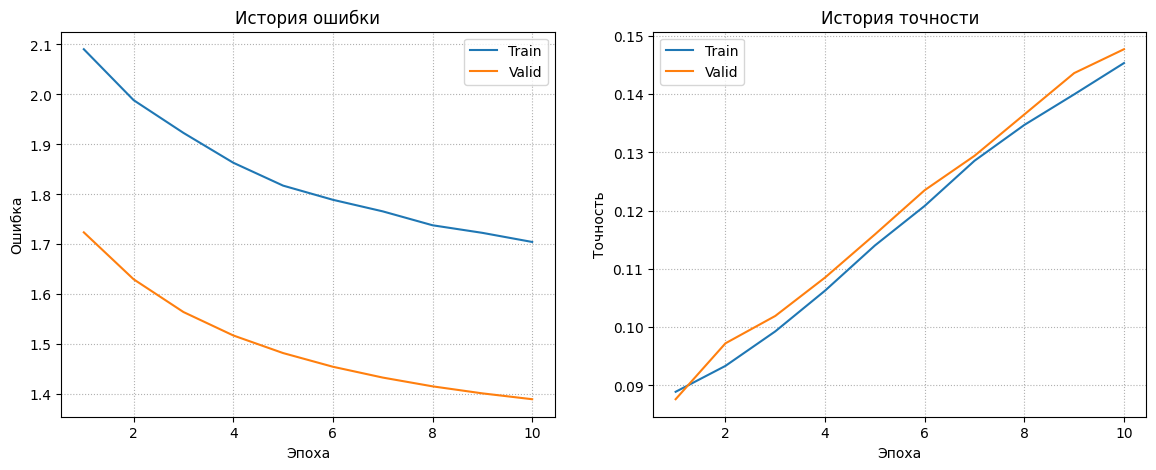

In [86]:
viz_utils.plot_learning_curves(train_loss_history, valid_loss_history,
                                train_acc_history, valid_acc_history)

In [87]:
test_dataloader = Dataloader(test_data, len(test_data), False)
model.eval()
for vecs, labels in test_dataloader:
    out = model.forward(vecs)

    loss = hinge_loss(out, labels)
    test_loss = loss.item()

    pred_labels = np.argmax(out.array, axis=-1)
    test_acc = np.sum(pred_labels == labels) / len(labels)

print(f"Ошибка на тесте: {test_loss:.4f}")
print(f"Точность на тесте: {test_acc:.4f}")

Ошибка на тесте: 1.3913
Точность на тесте: 0.1417


In [88]:
print(classification_report(labels, pred_labels))

              precision    recall  f1-score   support

           0       0.10      0.18      0.13      1000
           1       0.15      0.08      0.10      1000
           2       0.10      0.03      0.05      1000
           3       0.12      0.15      0.13      1000
           4       0.13      0.19      0.16      1000
           5       0.11      0.12      0.12      1000
           6       0.14      0.15      0.15      1000
           7       0.15      0.04      0.07      1000
           8       0.22      0.32      0.26      1000
           9       0.19      0.15      0.17      1000

    accuracy                           0.14     10000
   macro avg       0.14      0.14      0.13     10000
weighted avg       0.14      0.14      0.13     10000



#### Conclusion
Проверка градиента дала положительный результат.

Точность предсказания на тестовой выборке 0.2766, что вроде как неплохо

По графикам видно разницу между val и train. Поведение accuracy на тренировочной и валидационной выборке одинаково и растет равномерно

Присутствует разброс по метрике f1, что может говорить о разной способности различать определенные классы

### Эксперимент 5 Построение нейронной сети с Batchnorm слоем

Реализуйте эксперимент, доработав соответсвующие модули Numpy_NN фреймворка. Количество слоев, функций на ваше усмотрение. Можно добавлять любые другие функции активации, слои на ваше усмотрение, но указанный в эксперименте слой должен быть обязательно. Перед обучением проверьте с помощью utils.gradient_check градиент вашей модели.   

Проверим градиент модели

In [89]:
np.random.seed(42)

In [23]:
from nn.layers.batch_norm import BatchNorm

In [97]:
# проверка градиентов:
gr_check = Sequential(
    Linear(3072, 128),
    BatchNorm(128),
    ReLU(),
    Linear(128, 16),
    ReLU(),
    Linear(16, 10)
)
gr_check

Sequential(
	Linear(3072, 128, bias=True),
	BatchNorm(in_dim=128, eps=1e-05),
	ReLU(),
	Linear(128, 16, bias=True),
	ReLU(),
	Linear(16, 10, bias=True)
)

In [98]:
X, y = Dataloader(train_data, batch_size=2).__next__()
gradient_check(X, y, gr_check)

Backprop is correct!                                                                        


6.143381586608717e-10

In [124]:
np.random.seed(42)
model = Sequential(
    Linear(3072, 768),
    ReLU(),
    Linear(768, 128),
    BatchNorm(128),
    ReLU(),
    Linear(128, 10)
)
model

Sequential(
	Linear(3072, 768, bias=True),
	ReLU(),
	Linear(768, 128, bias=True),
	BatchNorm(in_dim=128, eps=1e-05),
	ReLU(),
	Linear(128, 10, bias=True)
)

In [125]:
train_loss_history, valid_loss_history, \
train_acc_history, valid_acc_history = train(
    dataset=train_data,
    model=model,
    epochs=10,
    lr=0.1,
    valid_dataset=valid_data,
    batch_size=10000,
    optim_method="GD")

|Epoch|Train loss|Train acc|Valid loss|Valid acc|  Grad/W  | Time, s  | Total, s |
|=====|==========|=========|==========|=========|==========|==========|==========|
| 1/10|  1.0660  | 0.1505  |  1.0974  | 0.1488  | 0.097651 |   16.1   |   16.1   |
| 2/10|  1.0444  | 0.1851  |  1.0569  | 0.1851  | 0.053911 |   10.5   |   26.6   |
| 3/10|  1.0367  | 0.2127  |  1.0423  | 0.2101  | 0.041752 |   10.3   |   36.9   |
| 4/10|  1.0316  | 0.2324  |  1.0347  | 0.2294  | 0.028746 |   10.6   |   47.5   |
| 5/10|  1.0278  | 0.2465  |  1.0299  | 0.2439  | 0.029067 |   12.0   |   59.5   |
| 6/10|  1.0249  | 0.2601  |  1.0265  | 0.2573  | 0.019596 |   11.2   |   70.7   |
| 7/10|  1.0226  | 0.2691  |  1.0240  | 0.2665  | 0.022125 |   10.5   |   81.2   |
| 8/10|  1.0207  | 0.2785  |  1.0219  | 0.2732  | 0.019047 |   10.1   |   91.3   |
| 9/10|  1.0191  | 0.2872  |  1.0202  | 0.2833  | 0.017554 |   9.8    |  101.1   |
|10/10|  1.0177  | 0.2923  |  1.0189  | 0.2857  | 0.013214 |   10.1   |  111.2   |


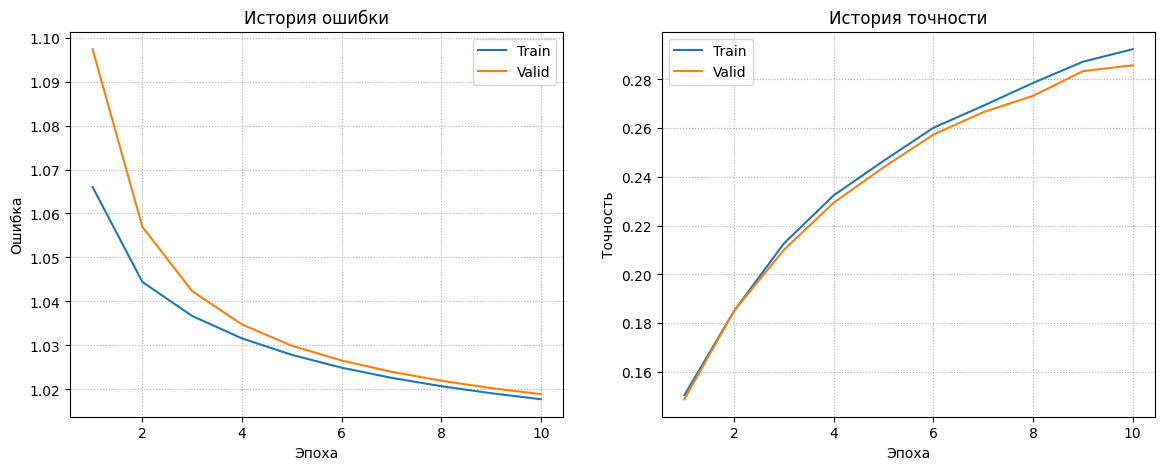

In [126]:
viz_utils.plot_learning_curves(train_loss_history, valid_loss_history,
                                train_acc_history, valid_acc_history)

In [127]:
test_dataloader = Dataloader(test_data, len(test_data), False)
model.eval()
for vecs, labels in test_dataloader:
    out = model.forward(vecs)

    loss = hinge_loss(out, labels)
    test_loss = loss.item()

    pred_labels = np.argmax(out.array, axis=-1)
    test_acc = np.sum(pred_labels == labels) / len(labels)

print(f"Ошибка на тесте: {test_loss:.4f}")
print(f"Точность на тесте: {test_acc:.4f}")

Ошибка на тесте: 1.0188
Точность на тесте: 0.2813


In [128]:
print(classification_report(labels, pred_labels))

              precision    recall  f1-score   support

           0       0.38      0.46      0.42      1000
           1       0.26      0.30      0.28      1000
           2       0.19      0.16      0.18      1000
           3       0.19      0.15      0.17      1000
           4       0.27      0.29      0.28      1000
           5       0.25      0.26      0.25      1000
           6       0.29      0.26      0.28      1000
           7       0.22      0.19      0.21      1000
           8       0.39      0.41      0.40      1000
           9       0.31      0.33      0.32      1000

    accuracy                           0.28     10000
   macro avg       0.28      0.28      0.28     10000
weighted avg       0.28      0.28      0.28     10000



#### Conclusion
Проверка градиента дала положительный результат.

Точность предсказания на тестовой выборке 0.2813, что вроде как неплохо 

BatchNorm позволил использовать более высокий lr, что повысило метрику

По графикам видно, что модель обучилась адекватно. Поведение loss и accuracy на тренировочной и валидационной выборке одинаково

Присутствует разброс по метрике f1, что может говорить о разной способности различать определенные классы

### Эксперимент 6 Эксперимент с Adam оптимизатором 

Обучите вашу нейронную сеть с Adam оптимизатором. Подбор гиперпараметров на ваше усмотрение. Перед обучением проверьте с помощью utils.gradient_check градиент вашей модели.   

Проведем проверку градиента

In [129]:
np.random.seed(42)
gr_check = Sequential(
    Linear(3072, 128),
    ReLU(),
    Linear(128, 16),
    ReLU(),
    Linear(16, 10)
)
gr_check

Sequential(
	Linear(3072, 128, bias=True),
	ReLU(),
	Linear(128, 16, bias=True),
	ReLU(),
	Linear(16, 10, bias=True)
)

In [105]:
X, y = Dataloader(train_data, batch_size=2).__next__()
gradient_check(X, y, gr_check)

Backprop is correct!                                                                        


2.919335737324909e-10

In [135]:
np.random.seed(42)
model = Sequential(
    Linear(3072, 768),
    ReLU(),
    Linear(768, 128),
    ReLU(),
    Linear(128, 10)
)
model

Sequential(
	Linear(3072, 768, bias=True),
	ReLU(),
	Linear(768, 128, bias=True),
	ReLU(),
	Linear(128, 10, bias=True)
)

In [136]:
train_loss_history, valid_loss_history, \
train_acc_history, valid_acc_history = train(
    dataset=train_data,
    model=model,
    epochs=10,
    lr=0.5,
    valid_dataset=valid_data,
    batch_size=10000,
    optim_method="Adam")

|Epoch|Train loss|Train acc|Valid loss|Valid acc|  Grad/W  | Time, s  | Total, s |
|=====|==========|=========|==========|=========|==========|==========|==========|
| 1/10|  1.5335  | 0.1791  |  1.3619  | 0.1805  | 1.716217 |   12.7   |   12.7   |
| 2/10|  1.3292  | 0.2185  |  1.2924  | 0.2152  | 1.019483 |   13.2   |   25.9   |
| 3/10|  1.2727  | 0.2446  |  1.2510  | 0.2412  | 0.679807 |   10.3   |   36.3   |
| 4/10|  1.2365  | 0.2644  |  1.2228  | 0.2645  | 0.603624 |   12.0   |   48.3   |
| 5/10|  1.2097  | 0.2798  |  1.1990  | 0.2766  | 0.486048 |   13.1   |   61.4   |
| 6/10|  1.1875  | 0.2893  |  1.1810  | 0.2833  | 0.390684 |   13.7   |   75.0   |
| 7/10|  1.1710  | 0.2965  |  1.1671  | 0.2890  | 0.308767 |   15.5   |   90.5   |
| 8/10|  1.1574  | 0.3045  |  1.1555  | 0.2960  | 0.301294 |   13.1   |  103.7   |
| 9/10|  1.1455  | 0.3120  |  1.1464  | 0.3039  | 0.320013 |   10.4   |  114.1   |
|10/10|  1.1358  | 0.3191  |  1.1391  | 0.3093  | 0.258190 |   12.5   |  126.5   |


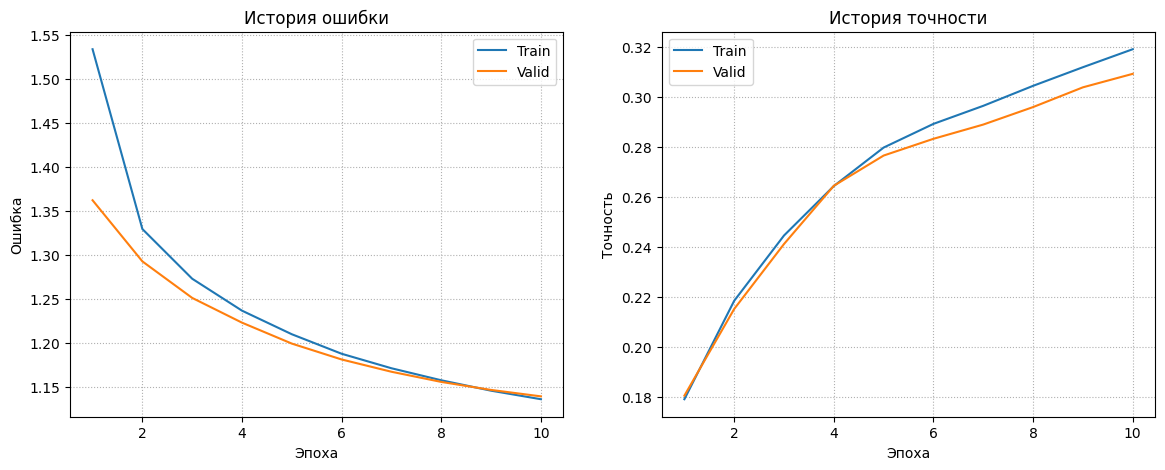

In [137]:
viz_utils.plot_learning_curves(train_loss_history, valid_loss_history,
                                train_acc_history, valid_acc_history)

In [138]:
test_dataloader = Dataloader(test_data, len(test_data), False)
model.eval()
for vecs, labels in test_dataloader:
    out = model.forward(vecs)

    loss = hinge_loss(out, labels)
    test_loss = loss.item()

    pred_labels = np.argmax(out.array, axis=-1)
    test_acc = np.sum(pred_labels == labels) / len(labels)

print(f"Ошибка на тесте: {test_loss:.4f}")
print(f"Точность на тесте: {test_acc:.4f}")

Ошибка на тесте: 1.1379
Точность на тесте: 0.3085


In [139]:
print(classification_report(labels, pred_labels))

              precision    recall  f1-score   support

           0       0.44      0.44      0.44      1000
           1       0.32      0.32      0.32      1000
           2       0.22      0.17      0.19      1000
           3       0.18      0.15      0.16      1000
           4       0.26      0.22      0.24      1000
           5       0.28      0.31      0.29      1000
           6       0.30      0.29      0.30      1000
           7       0.27      0.27      0.27      1000
           8       0.42      0.53      0.47      1000
           9       0.32      0.38      0.35      1000

    accuracy                           0.31     10000
   macro avg       0.30      0.31      0.30     10000
weighted avg       0.30      0.31      0.30     10000



Попробуем теперь добавить слои BatchNorm и Dropout

In [140]:
model = Sequential(
    Linear(3072, 768),
    ReLU(),
    Dropout(p=0.2),
    Linear(768, 128),
    BatchNorm(128),
    ReLU(),
    Linear(128, 10)
)
model

Sequential(
	Linear(3072, 768, bias=True),
	ReLU(),
	Dropout(p=0.2),
	Linear(768, 128, bias=True),
	BatchNorm(in_dim=128, eps=1e-05),
	ReLU(),
	Linear(128, 10, bias=True)
)

In [141]:
train_loss_history, valid_loss_history, \
train_acc_history, valid_acc_history = train(
    dataset=train_data,
    model=model,
    epochs=10,
    lr=0.5,
    valid_dataset=valid_data,
    batch_size=10000,
    optim_method="GD")

|Epoch|Train loss|Train acc|Valid loss|Valid acc|  Grad/W  | Time, s  | Total, s |
|=====|==========|=========|==========|=========|==========|==========|==========|
| 1/10|  1.0684  | 0.1889  |  1.0835  | 0.1878  | 0.480989 |   14.8   |   14.8   |
| 2/10|  1.0522  | 0.2296  |  1.0560  | 0.2286  | 0.298460 |   13.4   |   28.2   |
| 3/10|  1.0532  | 0.2442  |  1.0451  | 0.2428  | 0.314297 |   13.2   |   41.4   |
| 4/10|  1.0493  | 0.2415  |  1.0398  | 0.2382  | 0.294394 |   11.6   |   53.0   |
| 5/10|  1.0490  | 0.2345  |  1.0400  | 0.2271  | 0.306205 |   16.1   |   69.1   |
| 6/10|  1.0451  | 0.2844  |  1.0536  | 0.2755  | 0.235980 |   13.1   |   82.2   |
| 7/10|  1.0413  | 0.2933  |  1.0366  | 0.2846  | 0.193988 |   13.7   |   95.9   |
| 8/10|  1.0450  | 0.2609  |  1.0491  | 0.2513  | 0.234559 |   16.4   |  112.3   |
| 9/10|  1.0502  | 0.2697  |  1.0404  | 0.2628  | 0.173564 |   14.4   |  126.7   |
|10/10|  1.0454  | 0.2960  |  1.0357  | 0.2853  | 0.217497 |   12.5   |  139.1   |


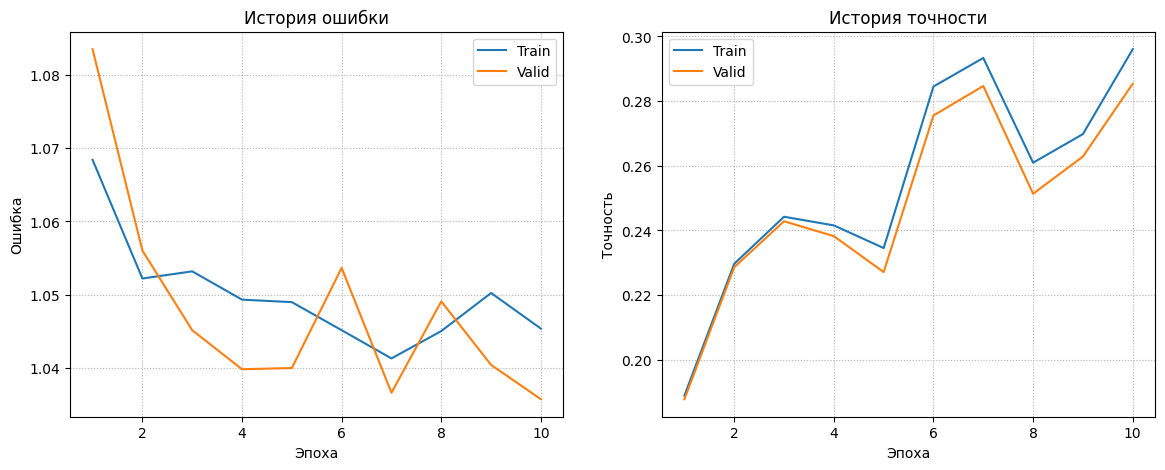

In [142]:
viz_utils.plot_learning_curves(train_loss_history, valid_loss_history,
                                train_acc_history, valid_acc_history)

In [143]:
test_dataloader = Dataloader(test_data, len(test_data), False)
model.eval()
for vecs, labels in test_dataloader:
    out = model.forward(vecs)

    loss = hinge_loss(out, labels)
    test_loss = loss.item()

    pred_labels = np.argmax(out.array, axis=-1)
    test_acc = np.sum(pred_labels == labels) / len(labels)

print(f"Ошибка на тесте: {test_loss:.4f}")
print(f"Точность на тесте: {test_acc:.4f}")

Ошибка на тесте: 1.0347
Точность на тесте: 0.2974


In [144]:
print(classification_report(labels, pred_labels))

              precision    recall  f1-score   support

           0       0.44      0.44      0.44      1000
           1       0.43      0.37      0.39      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.38      0.04      0.07      1000
           5       0.77      0.04      0.08      1000
           6       0.21      0.81      0.34      1000
           7       0.45      0.18      0.26      1000
           8       0.25      0.80      0.38      1000
           9       0.53      0.29      0.37      1000

    accuracy                           0.30     10000
   macro avg       0.35      0.30      0.23     10000
weighted avg       0.35      0.30      0.23     10000



/Users/muradgamzatov/Desktop/text2query/project/.venv/dl_sbt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/muradgamzatov/Desktop/text2query/project/.venv/dl_sbt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/muradgamzatov/Desktop/text2query/project/.venv/dl_sbt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

In [145]:
model = Sequential(
    Linear(3072, 768),
    ReLU(),
    Dropout(p=0.2),
    Linear(768, 128),
    BatchNorm(128),
    ReLU(),
    Linear(128, 10)
)
model

Sequential(
	Linear(3072, 768, bias=True),
	ReLU(),
	Dropout(p=0.2),
	Linear(768, 128, bias=True),
	BatchNorm(in_dim=128, eps=1e-05),
	ReLU(),
	Linear(128, 10, bias=True)
)

In [146]:
train_loss_history, valid_loss_history, \
train_acc_history, valid_acc_history = train(
    dataset=train_data,
    model=model,
    epochs=10,
    lr=0.5,
    valid_dataset=valid_data,
    batch_size=10000,
    optim_method="Adam")

|Epoch|Train loss|Train acc|Valid loss|Valid acc|  Grad/W  | Time, s  | Total, s |
|=====|==========|=========|==========|=========|==========|==========|==========|
| 1/10|  1.0866  | 0.1057  |  1.1224  | 0.1084  | 4.985434 |   14.5   |   14.5   |
| 2/10|  1.0773  | 0.1181  |  1.0817  | 0.1214  | 2.453942 |   13.1   |   27.6   |
| 3/10|  1.0704  | 0.1262  |  1.0652  | 0.1255  | 1.244324 |   13.8   |   41.4   |
| 4/10|  1.0654  | 0.1328  |  1.0566  | 0.1343  | 0.856392 |   16.0   |   57.4   |
| 5/10|  1.0619  | 0.1410  |  1.0515  | 0.1405  | 0.629755 |   15.0   |   72.4   |
| 6/10|  1.0591  | 0.1500  |  1.0484  | 0.1496  | 0.547603 |   11.9   |   84.3   |
| 7/10|  1.0569  | 0.1585  |  1.0461  | 0.1572  | 0.460677 |   12.8   |   97.1   |
| 8/10|  1.0549  | 0.1663  |  1.0443  | 0.1663  | 0.477222 |   12.9   |  110.0   |
| 9/10|  1.0536  | 0.1747  |  1.0427  | 0.1730  | 0.528082 |   13.2   |  123.2   |
|10/10|  1.0519  | 0.1827  |  1.0412  | 0.1776  | 0.352522 |   13.3   |  136.5   |


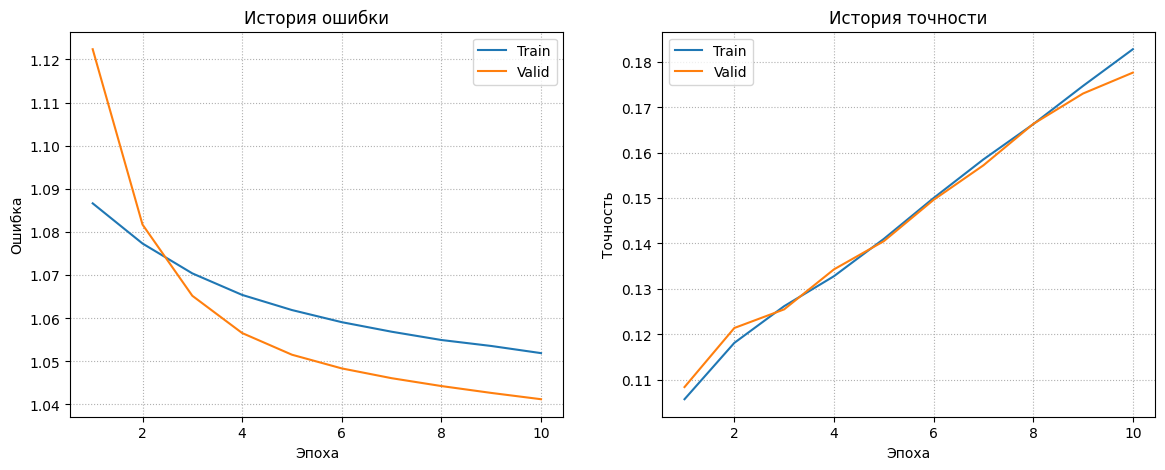

In [147]:
viz_utils.plot_learning_curves(train_loss_history, valid_loss_history,
                                train_acc_history, valid_acc_history)

In [148]:
test_dataloader = Dataloader(test_data, len(test_data), False)
model.eval()
for vecs, labels in test_dataloader:
    out = model.forward(vecs)

    loss = hinge_loss(out, labels)
    test_loss = loss.item()

    pred_labels = np.argmax(out.array, axis=-1)
    test_acc = np.sum(pred_labels == labels) / len(labels)

print(f"Ошибка на тесте: {test_loss:.4f}")
print(f"Точность на тесте: {test_acc:.4f}")

Ошибка на тесте: 1.0404
Точность на тесте: 0.1848


In [149]:
print(classification_report(labels, pred_labels))

              precision    recall  f1-score   support

           0       0.25      0.28      0.26      1000
           1       0.13      0.08      0.10      1000
           2       0.11      0.09      0.10      1000
           3       0.11      0.11      0.11      1000
           4       0.21      0.15      0.18      1000
           5       0.18      0.27      0.22      1000
           6       0.18      0.23      0.20      1000
           7       0.21      0.14      0.17      1000
           8       0.23      0.23      0.23      1000
           9       0.21      0.27      0.23      1000

    accuracy                           0.18     10000
   macro avg       0.18      0.18      0.18     10000
weighted avg       0.18      0.18      0.18     10000



#### Conclusion
Проверка градиента дала положительный результат.

В первом эксперименте Adam отработал лучше, во втором хуже. Но во втором сильно скакала метрика и loss, что может говорить о переобучении.

В дальнейших экспериментах предпочтительней использовать Adam

По графикам видно, что модель обучилась адекватно. Поведение loss и accuracy на тренировочной и валидационной выборке одинаково

Присутствует разброс по метрике f1, что может говорить о разной способности различать определенные классы

### Эксперимент 7 Эксперимент c количеством слоев

Зафиксируйте модель и начинайте добавлять слои. Как меняется качество модели?

In [150]:
np.random.seed(42)

#### Два слоя

In [151]:
model = Sequential(
    Linear(3072, 768),
    ReLU(),
    Dropout(p=0.2),
    Linear(768, 128),
    BatchNorm(128),
    ReLU(),
    Linear(128, 10)
)
model

Sequential(
	Linear(3072, 768, bias=True),
	ReLU(),
	Dropout(p=0.2),
	Linear(768, 128, bias=True),
	BatchNorm(in_dim=128, eps=1e-05),
	ReLU(),
	Linear(128, 10, bias=True)
)

In [152]:
train_loss_history, valid_loss_history, \
train_acc_history, valid_acc_history = train(
    dataset=train_data,
    model=model,
    epochs=10,
    lr=0.5,
    valid_dataset=valid_data,
    batch_size=10000,
    optim_method="Adam")

|Epoch|Train loss|Train acc|Valid loss|Valid acc|  Grad/W  | Time, s  | Total, s |
|=====|==========|=========|==========|=========|==========|==========|==========|
| 1/10|  1.0806  | 0.1185  |  1.1110  | 0.1196  | 3.932203 |   15.0   |   15.0   |
| 2/10|  1.0725  | 0.1268  |  1.0745  | 0.1297  | 2.084467 |   13.5   |   28.5   |
| 3/10|  1.0664  | 0.1364  |  1.0604  | 0.1362  | 1.380110 |   14.8   |   43.3   |
| 4/10|  1.0619  | 0.1440  |  1.0534  | 0.1423  | 0.878858 |   11.9   |   55.2   |
| 5/10|  1.0585  | 0.1497  |  1.0493  | 0.1498  | 0.565161 |   11.2   |   66.3   |
| 6/10|  1.0559  | 0.1561  |  1.0465  | 0.1581  | 0.488776 |   11.1   |   77.5   |
| 7/10|  1.0541  | 0.1622  |  1.0445  | 0.1640  | 0.458966 |   13.0   |   90.5   |
| 8/10|  1.0525  | 0.1686  |  1.0427  | 0.1694  | 0.391540 |   12.0   |  102.5   |
| 9/10|  1.0505  | 0.1746  |  1.0412  | 0.1754  | 0.383508 |   11.1   |  113.6   |
|10/10|  1.0490  | 0.1797  |  1.0398  | 0.1803  | 0.338195 |   11.1   |  124.6   |


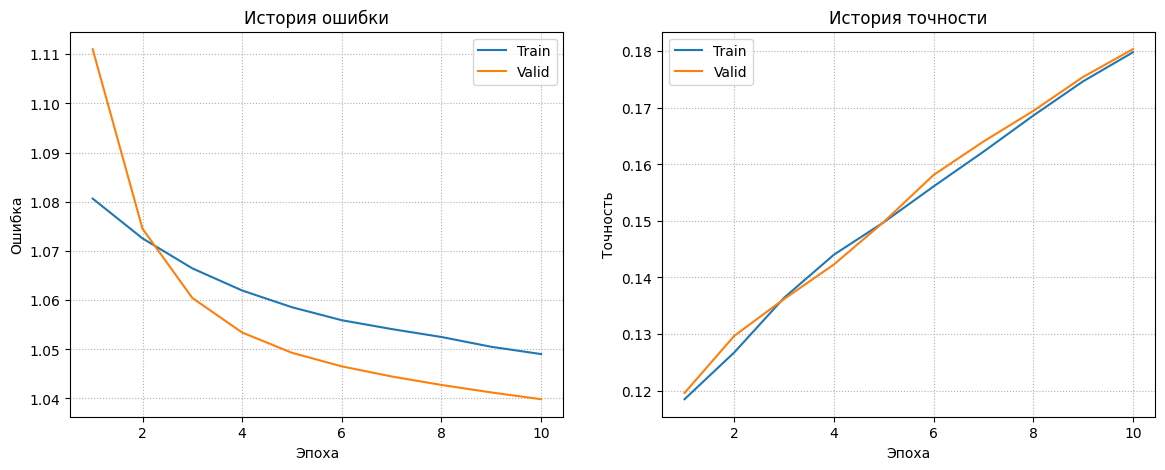

In [153]:
viz_utils.plot_learning_curves(train_loss_history, valid_loss_history,
                                train_acc_history, valid_acc_history)

In [154]:
test_dataloader = Dataloader(test_data, len(test_data), False)
model.eval()
for vecs, labels in test_dataloader:
    out = model.forward(vecs)

    loss = hinge_loss(out, labels)
    test_loss = loss.item()

    pred_labels = np.argmax(out.array, axis=-1)
    test_acc = np.sum(pred_labels == labels) / len(labels)

print(f"Ошибка на тесте: {test_loss:.4f}")
print(f"Точность на тесте: {test_acc:.4f}")

Ошибка на тесте: 1.0396
Точность на тесте: 0.1862


In [155]:
print(classification_report(labels, pred_labels))

              precision    recall  f1-score   support

           0       0.23      0.35      0.28      1000
           1       0.12      0.17      0.14      1000
           2       0.13      0.07      0.09      1000
           3       0.13      0.14      0.14      1000
           4       0.24      0.25      0.25      1000
           5       0.20      0.19      0.19      1000
           6       0.18      0.13      0.15      1000
           7       0.14      0.09      0.11      1000
           8       0.24      0.19      0.21      1000
           9       0.21      0.29      0.24      1000

    accuracy                           0.19     10000
   macro avg       0.18      0.19      0.18     10000
weighted avg       0.18      0.19      0.18     10000



#### Три слоя


In [156]:
model = Sequential(
    Linear(3072, 768),
    ReLU(),
    Dropout(p=0.2),
    Linear(768, 256),
    BatchNorm(256),
    ReLU(),
    Dropout(p=0.2),
    Linear(256, 64),
    BatchNorm(64),
    ReLU(),
    Linear(64, 10)
)
model

Sequential(
	Linear(3072, 768, bias=True),
	ReLU(),
	Dropout(p=0.2),
	Linear(768, 256, bias=True),
	BatchNorm(in_dim=256, eps=1e-05),
	ReLU(),
	Dropout(p=0.2),
	Linear(256, 64, bias=True),
	BatchNorm(in_dim=64, eps=1e-05),
	ReLU(),
	Linear(64, 10, bias=True)
)

In [157]:
train_loss_history, valid_loss_history, \
train_acc_history, valid_acc_history = train(
    dataset=train_data,
    model=model,
    epochs=10,
    lr=0.5,
    valid_dataset=valid_data,
    batch_size=10000,
    optim_method="Adam")

|Epoch|Train loss|Train acc|Valid loss|Valid acc|  Grad/W  | Time, s  | Total, s |
|=====|==========|=========|==========|=========|==========|==========|==========|
| 1/10|  1.1059  | 0.1137  |  1.3012  | 0.1153  | 4.125993 |   14.2   |   14.2   |
| 2/10|  1.0946  | 0.1306  |  1.1345  | 0.1316  | 2.992667 |   14.9   |   29.0   |
| 3/10|  1.0857  | 0.1451  |  1.0866  | 0.1464  | 2.139353 |   14.1   |   43.2   |
| 4/10|  1.0789  | 0.1525  |  1.0673  | 0.1519  | 1.586556 |   13.6   |   56.8   |
| 5/10|  1.0751  | 0.1569  |  1.0580  | 0.1587  | 0.982180 |   13.0   |   69.7   |
| 6/10|  1.0713  | 0.1606  |  1.0528  | 0.1625  | 0.909445 |   12.6   |   82.4   |
| 7/10|  1.0683  | 0.1626  |  1.0496  | 0.1637  | 1.233629 |   12.8   |   95.1   |
| 8/10|  1.0657  | 0.1670  |  1.0471  | 0.1683  | 0.847652 |   12.4   |  107.6   |
| 9/10|  1.0639  | 0.1710  |  1.0450  | 0.1720  | 0.587254 |   12.2   |  119.7   |
|10/10|  1.0621  | 0.1759  |  1.0431  | 0.1770  | 0.671222 |   12.2   |  131.9   |


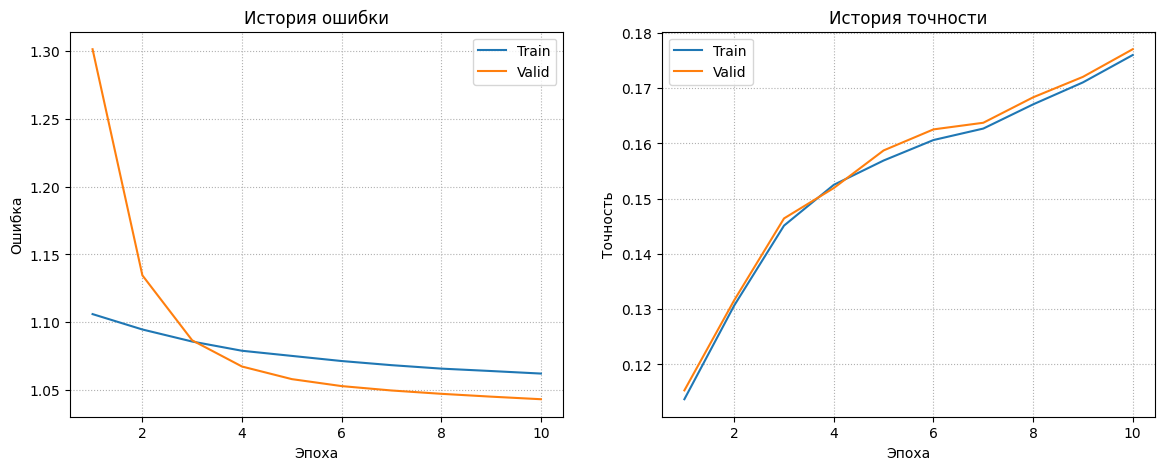

In [158]:
viz_utils.plot_learning_curves(train_loss_history, valid_loss_history,
                                train_acc_history, valid_acc_history)

In [159]:
test_dataloader = Dataloader(test_data, len(test_data), False)
model.eval()
for vecs, labels in test_dataloader:
    out = model.forward(vecs)

    loss = hinge_loss(out, labels)
    test_loss = loss.item()

    pred_labels = np.argmax(out.array, axis=-1)
    test_acc = np.sum(pred_labels == labels) / len(labels)

print(f"Ошибка на тесте: {test_loss:.4f}")
print(f"Точность на тесте: {test_acc:.4f}")

Ошибка на тесте: 1.0439
Точность на тесте: 0.1771


In [160]:
print(classification_report(labels, pred_labels))

              precision    recall  f1-score   support

           0       0.31      0.22      0.25      1000
           1       0.17      0.17      0.17      1000
           2       0.17      0.14      0.16      1000
           3       0.13      0.10      0.11      1000
           4       0.14      0.23      0.17      1000
           5       0.15      0.12      0.14      1000
           6       0.14      0.17      0.16      1000
           7       0.10      0.14      0.11      1000
           8       0.35      0.31      0.33      1000
           9       0.27      0.16      0.20      1000

    accuracy                           0.18     10000
   macro avg       0.19      0.18      0.18     10000
weighted avg       0.19      0.18      0.18     10000



#### Пять слоев

In [161]:
model = Sequential(
    Linear(3072, 768),
    ReLU(),
    Dropout(p=0.2),
    Linear(768, 384),
    BatchNorm(384),
    ReLU(),
    Dropout(p=0.2),
    Linear(384, 128),
    BatchNorm(128),
    ReLU(),
    Dropout(p=0.1),
    Linear(128, 64),
    BatchNorm(64),
    ReLU(),
    Dropout(p=0.2),
    Linear(64, 16),
    BatchNorm(16),
    ReLU(),
    Linear(16, 10),
)
model

Sequential(
	Linear(3072, 768, bias=True),
	ReLU(),
	Dropout(p=0.2),
	Linear(768, 384, bias=True),
	BatchNorm(in_dim=384, eps=1e-05),
	ReLU(),
	Dropout(p=0.2),
	Linear(384, 128, bias=True),
	BatchNorm(in_dim=128, eps=1e-05),
	ReLU(),
	Dropout(p=0.1),
	Linear(128, 64, bias=True),
	BatchNorm(in_dim=64, eps=1e-05),
	ReLU(),
	Dropout(p=0.2),
	Linear(64, 16, bias=True),
	BatchNorm(in_dim=16, eps=1e-05),
	ReLU(),
	Linear(16, 10, bias=True)
)

In [162]:
train_loss_history, valid_loss_history, \
train_acc_history, valid_acc_history = train(
    dataset=train_data,
    model=model,
    epochs=10,
    lr=0.5,
    valid_dataset=valid_data,
    batch_size=10000,
    optim_method="Adam")

|Epoch|Train loss|Train acc|Valid loss|Valid acc|  Grad/W  | Time, s  | Total, s |
|=====|==========|=========|==========|=========|==========|==========|==========|
| 1/10|  1.2164  | 0.1026  |  2.3931  | 0.1034  | 5.133319 |   21.4   |   21.4   |
| 2/10|  1.1970  | 0.1009  |  1.4031  | 0.0978  | 2.994190 |   14.4   |   35.8   |
| 3/10|  1.1795  | 0.1082  |  1.2136  | 0.1007  | 2.051822 |   14.7   |   50.5   |
| 4/10|  1.1652  | 0.1186  |  1.1512  | 0.1127  | 1.780036 |   23.8   |   74.3   |
| 5/10|  1.1548  | 0.1309  |  1.1249  | 0.1272  | 1.090867 |   21.3   |   95.7   |
| 6/10|  1.1430  | 0.1377  |  1.1106  | 0.1340  | 1.007490 |   15.8   |  111.5   |
| 7/10|  1.1340  | 0.1453  |  1.1009  | 0.1385  | 0.899957 |   16.8   |  128.3   |
| 8/10|  1.1285  | 0.1497  |  1.0933  | 0.1422  | 0.839559 |   16.4   |  144.6   |
| 9/10|  1.1220  | 0.1525  |  1.0868  | 0.1450  | 0.871358 |   14.6   |  159.2   |
|10/10|  1.1162  | 0.1540  |  1.0815  | 0.1485  | 0.683286 |   14.4   |  173.6   |


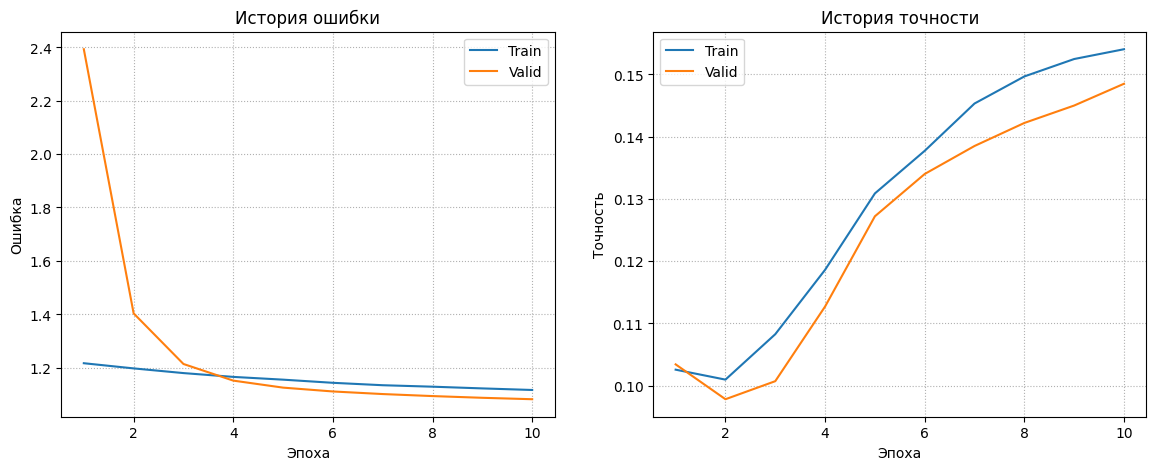

In [163]:
viz_utils.plot_learning_curves(train_loss_history, valid_loss_history,
                                train_acc_history, valid_acc_history)

In [164]:
test_dataloader = Dataloader(test_data, len(test_data), False)
model.eval()
for vecs, labels in test_dataloader:
    out = model.forward(vecs)

    loss = hinge_loss(out, labels)
    test_loss = loss.item()

    pred_labels = np.argmax(out.array, axis=-1)
    test_acc = np.sum(pred_labels == labels) / len(labels)

print(f"Ошибка на тесте: {test_loss:.4f}")
print(f"Точность на тесте: {test_acc:.4f}")

Ошибка на тесте: 1.0829
Точность на тесте: 0.1493


In [165]:
print(classification_report(labels, pred_labels))

              precision    recall  f1-score   support

           0       0.14      0.15      0.14      1000
           1       0.07      0.07      0.07      1000
           2       0.10      0.07      0.08      1000
           3       0.13      0.09      0.10      1000
           4       0.04      0.01      0.02      1000
           5       0.13      0.04      0.06      1000
           6       0.16      0.50      0.24      1000
           7       0.09      0.07      0.08      1000
           8       0.27      0.39      0.32      1000
           9       0.15      0.12      0.13      1000

    accuracy                           0.15     10000
   macro avg       0.13      0.15      0.12     10000
weighted avg       0.13      0.15      0.12     10000



#### Conclusion
Лучше всех отработало два слоя, но как видно из графиков это скорее всего изза недостаточного количества эпох для последних. Более глубокие сетки при одинаковых гиперпараметрах недообучились

### Эксперимент 8 Эксперимент c количеством нейронов

Зафиксируйте модель и увеличьте количетсво весов в одном из слоев. Дает ли это прирост качества?

In [166]:
np.random.seed(42)

In [167]:
model = Sequential(
    Linear(3072, 768),
    ReLU(),
    Dropout(p=0.2),
    Linear(768, 128),
    BatchNorm(128),
    ReLU(),
    Linear(128, 10)
)
model

Sequential(
	Linear(3072, 768, bias=True),
	ReLU(),
	Dropout(p=0.2),
	Linear(768, 128, bias=True),
	BatchNorm(in_dim=128, eps=1e-05),
	ReLU(),
	Linear(128, 10, bias=True)
)

In [168]:
train_loss_history, valid_loss_history, \
train_acc_history, valid_acc_history = train(
    dataset=train_data,
    model=model,
    epochs=10,
    lr=0.5,
    valid_dataset=valid_data,
    batch_size=10000,
    optim_method="Adam")

|Epoch|Train loss|Train acc|Valid loss|Valid acc|  Grad/W  | Time, s  | Total, s |
|=====|==========|=========|==========|=========|==========|==========|==========|
| 1/10|  1.0806  | 0.1185  |  1.1110  | 0.1196  | 3.932203 |   13.2   |   13.2   |
| 2/10|  1.0725  | 0.1268  |  1.0745  | 0.1297  | 2.084467 |   15.5   |   28.7   |
| 3/10|  1.0664  | 0.1364  |  1.0604  | 0.1362  | 1.380110 |   16.1   |   44.8   |
| 4/10|  1.0619  | 0.1440  |  1.0534  | 0.1423  | 0.878858 |   20.7   |   65.6   |
| 5/10|  1.0585  | 0.1497  |  1.0493  | 0.1498  | 0.565161 |   20.3   |   85.9   |
| 6/10|  1.0559  | 0.1561  |  1.0465  | 0.1581  | 0.488776 |   21.2   |  107.1   |
| 7/10|  1.0541  | 0.1622  |  1.0445  | 0.1640  | 0.458966 |   19.6   |  126.8   |
| 8/10|  1.0525  | 0.1686  |  1.0427  | 0.1694  | 0.391540 |   17.5   |  144.3   |
| 9/10|  1.0505  | 0.1746  |  1.0412  | 0.1754  | 0.383508 |   31.2   |  175.5   |
|10/10|  1.0490  | 0.1797  |  1.0398  | 0.1803  | 0.338195 |   32.1   |  207.6   |


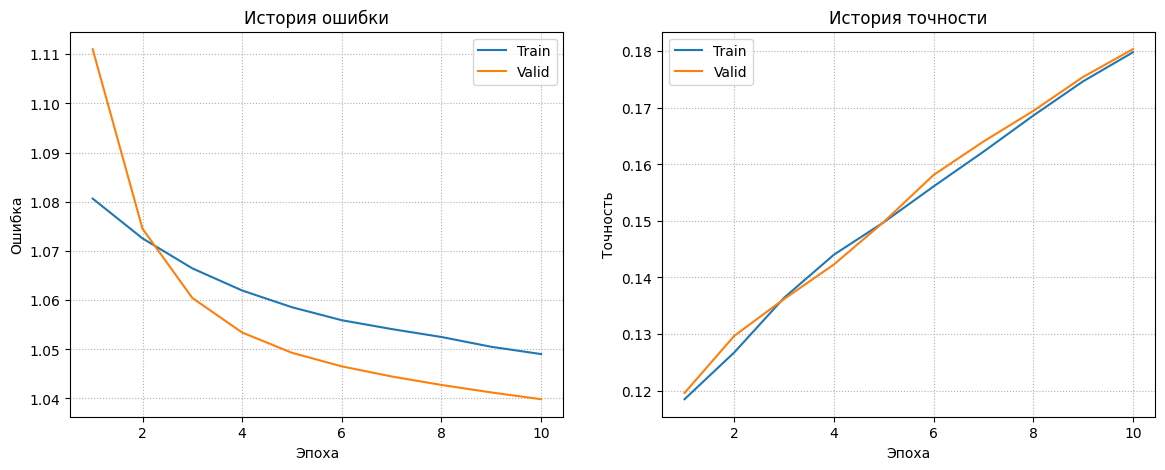

In [169]:
viz_utils.plot_learning_curves(train_loss_history, valid_loss_history,
                                train_acc_history, valid_acc_history)

In [170]:
test_dataloader = Dataloader(test_data, len(test_data), False)
model.eval()
for vecs, labels in test_dataloader:
    out = model.forward(vecs)

    loss = hinge_loss(out, labels)
    test_loss = loss.item()

    pred_labels = np.argmax(out.array, axis=-1)
    test_acc = np.sum(pred_labels == labels) / len(labels)

print(f"Ошибка на тесте: {test_loss:.4f}")
print(f"Точность на тесте: {test_acc:.4f}")

Ошибка на тесте: 1.0396
Точность на тесте: 0.1862


In [171]:
print(classification_report(labels, pred_labels))

              precision    recall  f1-score   support

           0       0.23      0.35      0.28      1000
           1       0.12      0.17      0.14      1000
           2       0.13      0.07      0.09      1000
           3       0.13      0.14      0.14      1000
           4       0.24      0.25      0.25      1000
           5       0.20      0.19      0.19      1000
           6       0.18      0.13      0.15      1000
           7       0.14      0.09      0.11      1000
           8       0.24      0.19      0.21      1000
           9       0.21      0.29      0.24      1000

    accuracy                           0.19     10000
   macro avg       0.18      0.19      0.18     10000
weighted avg       0.18      0.19      0.18     10000



In [172]:
model = Sequential(
    Linear(3072, 1024),
    ReLU(),
    Dropout(p=0.2),
    Linear(1024, 512),
    BatchNorm(512),
    ReLU(),
    Linear(512, 10)
)
model

Sequential(
	Linear(3072, 1024, bias=True),
	ReLU(),
	Dropout(p=0.2),
	Linear(1024, 512, bias=True),
	BatchNorm(in_dim=512, eps=1e-05),
	ReLU(),
	Linear(512, 10, bias=True)
)

In [173]:
train_loss_history, valid_loss_history, \
train_acc_history, valid_acc_history = train(
    dataset=train_data,
    model=model,
    epochs=10,
    lr=0.5,
    valid_dataset=valid_data,
    batch_size=10000,
    optim_method="Adam")

|Epoch|Train loss|Train acc|Valid loss|Valid acc|  Grad/W  | Time, s  | Total, s |
|=====|==========|=========|==========|=========|==========|==========|==========|
| 1/10|  1.0436  | 0.1112  |  1.0708  | 0.1132  | 3.216578 |   42.5   |   42.5   |
| 2/10|  1.0369  | 0.1203  |  1.0423  | 0.1225  | 1.160669 |   37.8   |   80.3   |
| 3/10|  1.0346  | 0.1242  |  1.0337  | 0.1285  | 0.744885 |   28.5   |  108.8   |
| 4/10|  1.0334  | 0.1295  |  1.0301  | 0.1337  | 0.680750 |   23.9   |  132.7   |
| 5/10|  1.0325  | 0.1368  |  1.0280  | 0.1414  | 0.617014 |   20.1   |  152.8   |
| 6/10|  1.0315  | 0.1433  |  1.0264  | 0.1470  | 0.534641 |   19.7   |  172.5   |
| 7/10|  1.0306  | 0.1498  |  1.0250  | 0.1531  | 0.455670 |   18.1   |  190.5   |
| 8/10|  1.0297  | 0.1565  |  1.0239  | 0.1612  | 0.414185 |   17.0   |  207.6   |
| 9/10|  1.0292  | 0.1630  |  1.0231  | 0.1651  | 0.337314 |   18.1   |  225.7   |
|10/10|  1.0285  | 0.1678  |  1.0224  | 0.1709  | 0.351186 |   20.3   |  245.9   |


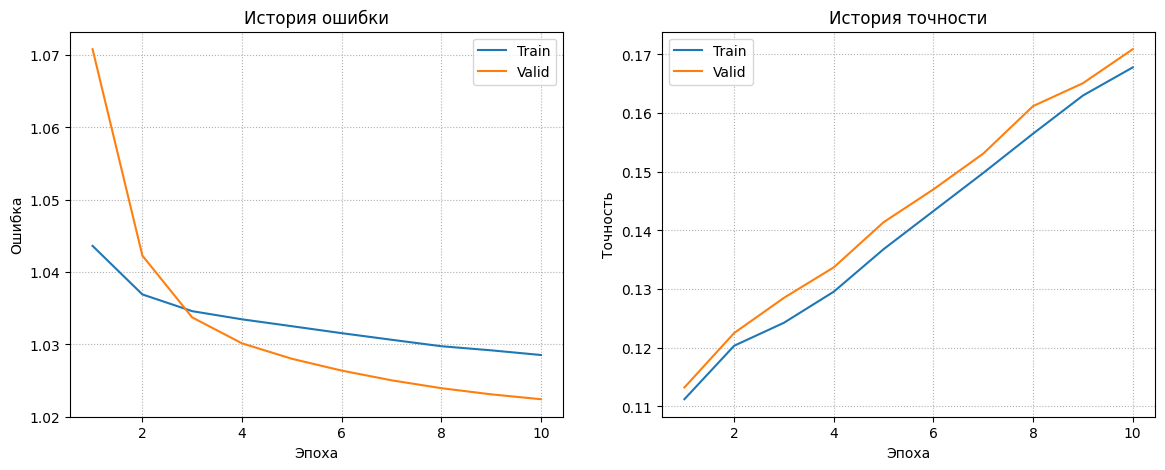

In [174]:
viz_utils.plot_learning_curves(train_loss_history, valid_loss_history,
                                train_acc_history, valid_acc_history)

In [175]:
test_dataloader = Dataloader(test_data, len(test_data), False)
model.eval()
for vecs, labels in test_dataloader:
    out = model.forward(vecs)

    loss = hinge_loss(out, labels)
    test_loss = loss.item()

    pred_labels = np.argmax(out.array, axis=-1)
    test_acc = np.sum(pred_labels == labels) / len(labels)

print(f"Ошибка на тесте: {test_loss:.4f}")
print(f"Точность на тесте: {test_acc:.4f}")

Ошибка на тесте: 1.0221
Точность на тесте: 0.1706


In [176]:
print(classification_report(labels, pred_labels))

              precision    recall  f1-score   support

           0       0.25      0.24      0.25      1000
           1       0.17      0.13      0.15      1000
           2       0.11      0.09      0.10      1000
           3       0.13      0.12      0.12      1000
           4       0.16      0.15      0.16      1000
           5       0.10      0.11      0.11      1000
           6       0.23      0.20      0.22      1000
           7       0.14      0.16      0.15      1000
           8       0.23      0.26      0.24      1000
           9       0.19      0.23      0.21      1000

    accuracy                           0.17     10000
   macro avg       0.17      0.17      0.17     10000
weighted avg       0.17      0.17      0.17     10000



In [177]:
model2 = Sequential(
    Linear(3072, 256),
    ReLU(),
    Dropout(p=0.2),
    Linear(256, 32),
    BatchNorm(32),
    ReLU(),
    Linear(32, 10)
)
model2

Sequential(
	Linear(3072, 256, bias=True),
	ReLU(),
	Dropout(p=0.2),
	Linear(256, 32, bias=True),
	BatchNorm(in_dim=32, eps=1e-05),
	ReLU(),
	Linear(32, 10, bias=True)
)

In [178]:
train_loss_history, valid_loss_history, \
train_acc_history, valid_acc_history = train(
    dataset=train_data,
    model=model2,
    epochs=10,
    lr=0.5,
    valid_dataset=valid_data,
    batch_size=10000,
    optim_method="Adam")

|Epoch|Train loss|Train acc|Valid loss|Valid acc|  Grad/W  | Time, s  | Total, s |
|=====|==========|=========|==========|=========|==========|==========|==========|
| 1/10|  1.1411  | 0.1143  |  1.2041  | 0.1076  | 4.847224 |   7.8    |   7.8    |
| 2/10|  1.1192  | 0.1205  |  1.1310  | 0.1138  | 2.029871 |   6.6    |   14.5   |
| 3/10|  1.1026  | 0.1292  |  1.1018  | 0.1233  | 1.646130 |   5.9    |   20.3   |
| 4/10|  1.0918  | 0.1362  |  1.0865  | 0.1317  | 1.005715 |   5.1    |   25.4   |
| 5/10|  1.0836  | 0.1410  |  1.0768  | 0.1404  | 0.767446 |   5.3    |   30.7   |
| 6/10|  1.0775  | 0.1494  |  1.0700  | 0.1502  | 0.522744 |   5.7    |   36.4   |
| 7/10|  1.0730  | 0.1555  |  1.0649  | 0.1588  | 0.472538 |   6.4    |   42.9   |
| 8/10|  1.0692  | 0.1634  |  1.0611  | 0.1667  | 0.420114 |   6.1    |   48.9   |
| 9/10|  1.0667  | 0.1699  |  1.0580  | 0.1719  | 0.272183 |   5.7    |   54.7   |
|10/10|  1.0638  | 0.1753  |  1.0554  | 0.1766  | 0.254725 |   5.2    |   59.9   |


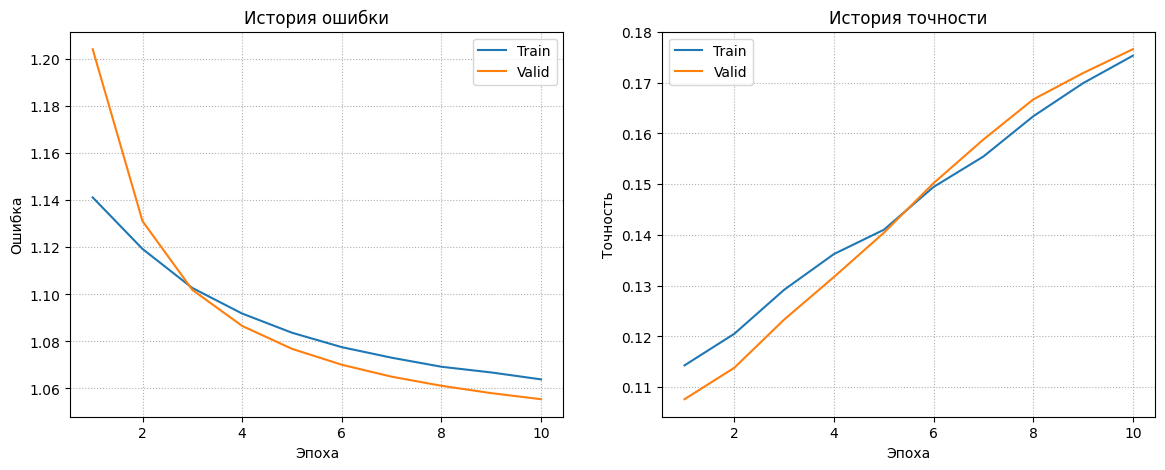

In [179]:
viz_utils.plot_learning_curves(train_loss_history, valid_loss_history,
                                train_acc_history, valid_acc_history)

In [180]:
test_dataloader = Dataloader(test_data, len(test_data), False)
model2.eval()
for vecs, labels in test_dataloader:
    out = model.forward(vecs)

    loss = hinge_loss(out, labels)
    test_loss = loss.item()

    pred_labels = np.argmax(out.array, axis=-1)
    test_acc = np.sum(pred_labels == labels) / len(labels)

print(f"Ошибка на тесте: {test_loss:.4f}")
print(f"Точность на тесте: {test_acc:.4f}")

Ошибка на тесте: 1.0221
Точность на тесте: 0.1706


In [181]:
print(classification_report(labels, pred_labels))

              precision    recall  f1-score   support

           0       0.25      0.24      0.25      1000
           1       0.17      0.13      0.15      1000
           2       0.11      0.09      0.10      1000
           3       0.13      0.12      0.12      1000
           4       0.16      0.15      0.16      1000
           5       0.10      0.11      0.11      1000
           6       0.23      0.20      0.22      1000
           7       0.14      0.16      0.15      1000
           8       0.23      0.26      0.24      1000
           9       0.19      0.23      0.21      1000

    accuracy                           0.17     10000
   macro avg       0.17      0.17      0.17     10000
weighted avg       0.17      0.17      0.17     10000



### Эксперимент 9 Эксперимент c размером батча

Зафиксируйте модель и обучитесь на разных размерах. Как размер батча влияет на процесс обучения?

In [182]:
np.random.seed(42)

In [183]:
model = Sequential(
    Linear(3072, 768),
    ReLU(),
    Dropout(p=0.2),
    Linear(768, 128),
    BatchNorm(128),
    ReLU(),
    Linear(128, 10)
)
model

Sequential(
	Linear(3072, 768, bias=True),
	ReLU(),
	Dropout(p=0.2),
	Linear(768, 128, bias=True),
	BatchNorm(in_dim=128, eps=1e-05),
	ReLU(),
	Linear(128, 10, bias=True)
)

#### Batch size = 5000

In [184]:
train_loss_history, valid_loss_history, \
train_acc_history, valid_acc_history = train(
    dataset=train_data,
    model=model,
    epochs=10,
    lr=0.5,
    valid_dataset=valid_data,
    batch_size=5000,
    optim_method="Adam")

|Epoch|Train loss|Train acc|Valid loss|Valid acc|  Grad/W  | Time, s  | Total, s |
|=====|==========|=========|==========|=========|==========|==========|==========|
| 1/10|  1.0767  | 0.1271  |  1.0745  | 0.1293  | 2.075591 |   16.3   |   16.3   |
| 2/10|  1.0642  | 0.1446  |  1.0534  | 0.1423  | 1.012284 |   12.4   |   28.8   |
| 3/10|  1.0573  | 0.1562  |  1.0465  | 0.1585  | 0.490386 |   11.5   |   40.3   |
| 4/10|  1.0530  | 0.1683  |  1.0427  | 0.1697  | 0.512212 |   11.9   |   52.2   |
| 5/10|  1.0498  | 0.1798  |  1.0398  | 0.1792  | 0.462680 |   12.0   |   64.2   |
| 6/10|  1.0471  | 0.1908  |  1.0374  | 0.1876  | 0.446915 |   11.5   |   75.6   |
| 7/10|  1.0451  | 0.1990  |  1.0354  | 0.1985  | 0.316855 |   12.3   |   87.9   |
| 8/10|  1.0433  | 0.2052  |  1.0337  | 0.2043  | 0.342967 |   12.3   |  100.2   |
| 9/10|  1.0412  | 0.2107  |  1.0323  | 0.2114  | 0.332342 |   12.0   |  112.2   |
|10/10|  1.0397  | 0.2169  |  1.0310  | 0.2159  | 0.298856 |   11.0   |  123.1   |


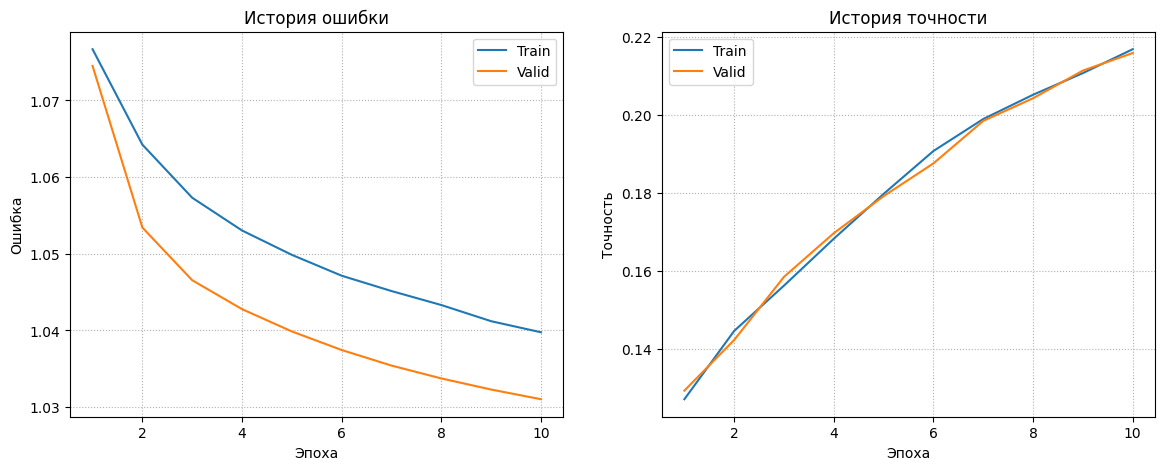

In [185]:
viz_utils.plot_learning_curves(train_loss_history, valid_loss_history,
                                train_acc_history, valid_acc_history)

In [186]:
test_dataloader = Dataloader(test_data, len(test_data), False)
model.eval()
for vecs, labels in test_dataloader:
    out = model.forward(vecs)

    loss = hinge_loss(out, labels)
    test_loss = loss.item()

    pred_labels = np.argmax(out.array, axis=-1)
    test_acc = np.sum(pred_labels == labels) / len(labels)

print(f"Ошибка на тесте: {test_loss:.4f}")
print(f"Точность на тесте: {test_acc:.4f}")

Ошибка на тесте: 1.0307
Точность на тесте: 0.2181


In [187]:
print(classification_report(labels, pred_labels))

              precision    recall  f1-score   support

           0       0.29      0.42      0.35      1000
           1       0.15      0.18      0.17      1000
           2       0.14      0.10      0.11      1000
           3       0.16      0.13      0.14      1000
           4       0.25      0.29      0.27      1000
           5       0.21      0.20      0.21      1000
           6       0.21      0.17      0.19      1000
           7       0.16      0.12      0.14      1000
           8       0.29      0.26      0.28      1000
           9       0.25      0.30      0.27      1000

    accuracy                           0.22     10000
   macro avg       0.21      0.22      0.21     10000
weighted avg       0.21      0.22      0.21     10000



#### Batch size = 20000

In [188]:
model = Sequential(
    Linear(3072, 768),
    ReLU(),
    Dropout(p=0.2),
    Linear(768, 128),
    BatchNorm(128),
    ReLU(),
    Linear(128, 10)
)
model

Sequential(
	Linear(3072, 768, bias=True),
	ReLU(),
	Dropout(p=0.2),
	Linear(768, 128, bias=True),
	BatchNorm(in_dim=128, eps=1e-05),
	ReLU(),
	Linear(128, 10, bias=True)
)

In [189]:
train_loss_history, valid_loss_history, \
train_acc_history, valid_acc_history = train(
    dataset=train_data,
    model=model,
    epochs=10,
    lr=0.5,
    valid_dataset=valid_data,
    batch_size=20000,
    optim_method="Adam")

|Epoch|Train loss|Train acc|Valid loss|Valid acc|  Grad/W  | Time, s  | Total, s |
|=====|==========|=========|==========|=========|==========|==========|==========|
| 1/10|  1.0892  | 0.1154  |  1.2307  | 0.1126  | 9.523357 |   14.2   |   14.2   |
| 2/10|  1.0821  | 0.1196  |  1.1459  | 0.1214  | 4.506871 |   13.8   |   28.0   |
| 3/10|  1.0759  | 0.1249  |  1.1083  | 0.1242  | 2.529976 |   12.3   |   40.3   |
| 4/10|  1.0716  | 0.1288  |  1.0871  | 0.1295  | 1.978193 |   10.9   |   51.3   |
| 5/10|  1.0680  | 0.1347  |  1.0740  | 0.1363  | 1.295574 |   10.9   |   62.1   |
| 6/10|  1.0651  | 0.1372  |  1.0654  | 0.1402  | 1.237887 |   11.1   |   73.2   |
| 7/10|  1.0626  | 0.1391  |  1.0595  | 0.1435  | 0.885640 |   12.0   |   85.2   |
| 8/10|  1.0609  | 0.1417  |  1.0554  | 0.1468  | 0.841224 |   11.4   |   96.6   |
| 9/10|  1.0592  | 0.1442  |  1.0523  | 0.1493  | 0.714851 |   12.1   |  108.8   |
|10/10|  1.0573  | 0.1468  |  1.0500  | 0.1517  | 0.643115 |   12.9   |  121.6   |


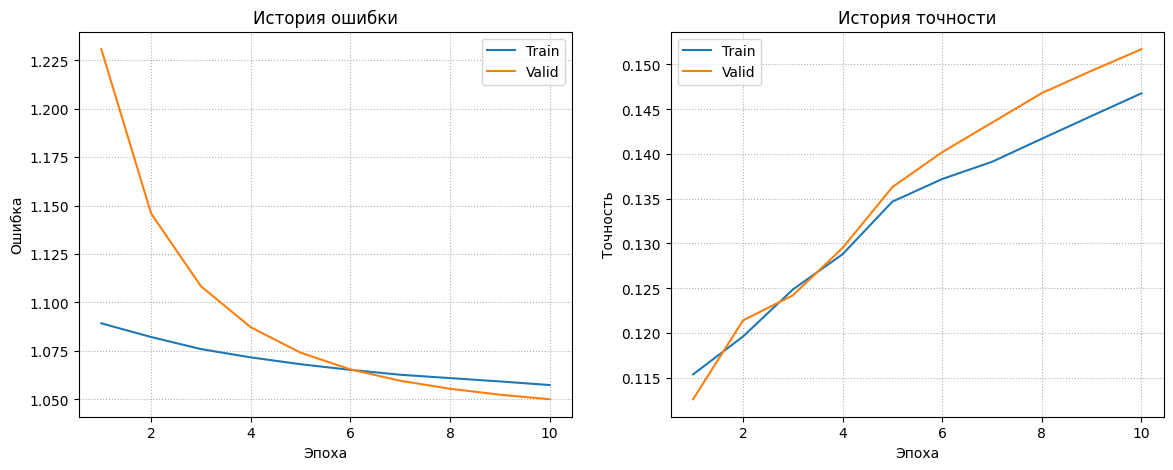

In [190]:
viz_utils.plot_learning_curves(train_loss_history, valid_loss_history,
                                train_acc_history, valid_acc_history)

In [191]:
test_dataloader = Dataloader(test_data, len(test_data), False)
model.eval()
for vecs, labels in test_dataloader:
    out = model.forward(vecs)

    loss = hinge_loss(out, labels)
    test_loss = loss.item()

    pred_labels = np.argmax(out.array, axis=-1)
    test_acc = np.sum(pred_labels == labels) / len(labels)

print(f"Ошибка на тесте: {test_loss:.4f}")
print(f"Точность на тесте: {test_acc:.4f}")

Ошибка на тесте: 1.0501
Точность на тесте: 0.1484


In [192]:
print(classification_report(labels, pred_labels))

              precision    recall  f1-score   support

           0       0.16      0.16      0.16      1000
           1       0.19      0.17      0.18      1000
           2       0.12      0.12      0.12      1000
           3       0.09      0.09      0.09      1000
           4       0.13      0.06      0.08      1000
           5       0.17      0.13      0.15      1000
           6       0.17      0.24      0.20      1000
           7       0.15      0.17      0.16      1000
           8       0.13      0.14      0.14      1000
           9       0.17      0.20      0.18      1000

    accuracy                           0.15     10000
   macro avg       0.15      0.15      0.15     10000
weighted avg       0.15      0.15      0.15     10000



#### Batch size = 40000


In [193]:
model = Sequential(
    Linear(3072, 768),
    ReLU(),
    Dropout(p=0.2),
    Linear(768, 128),
    BatchNorm(128),
    ReLU(),
    Linear(128, 10)
)
model

Sequential(
	Linear(3072, 768, bias=True),
	ReLU(),
	Dropout(p=0.2),
	Linear(768, 128, bias=True),
	BatchNorm(in_dim=128, eps=1e-05),
	ReLU(),
	Linear(128, 10, bias=True)
)

In [194]:
train_loss_history, valid_loss_history, \
train_acc_history, valid_acc_history = train(
    dataset=train_data,
    model=model,
    epochs=10,
    lr=0.5,
    valid_dataset=valid_data,
    batch_size=40000,
    optim_method="Adam")

|Epoch|Train loss|Train acc|Valid loss|Valid acc|  Grad/W  | Time, s  | Total, s |
|=====|==========|=========|==========|=========|==========|==========|==========|
| 1/10|  1.0849  | 0.1103  |  1.2243  | 0.1089  |15.814939 |   28.7   |   28.8   |
| 2/10|  1.0818  | 0.1117  |  1.1564  | 0.1117  | 9.371618 |   37.4   |   66.1   |
| 3/10|  1.0793  | 0.1142  |  1.1259  | 0.1145  | 5.178684 |   44.1   |  110.2   |
| 4/10|  1.0774  | 0.1167  |  1.1077  | 0.1156  | 3.697332 |   50.7   |  160.9   |
| 5/10|  1.0748  | 0.1194  |  1.0954  | 0.1192  | 3.250859 |   31.0   |  192.0   |
| 6/10|  1.0734  | 0.1220  |  1.0863  | 0.1227  | 2.830702 |   29.3   |  221.3   |
| 7/10|  1.0711  | 0.1246  |  1.0793  | 0.1250  | 2.467756 |   24.0   |  245.3   |
| 8/10|  1.0694  | 0.1279  |  1.0738  | 0.1295  | 1.904578 |   22.2   |  267.6   |
| 9/10|  1.0681  | 0.1306  |  1.0693  | 0.1332  | 1.612631 |   20.9   |  288.4   |
|10/10|  1.0666  | 0.1336  |  1.0657  | 0.1338  | 1.511897 |   17.9   |  306.3   |


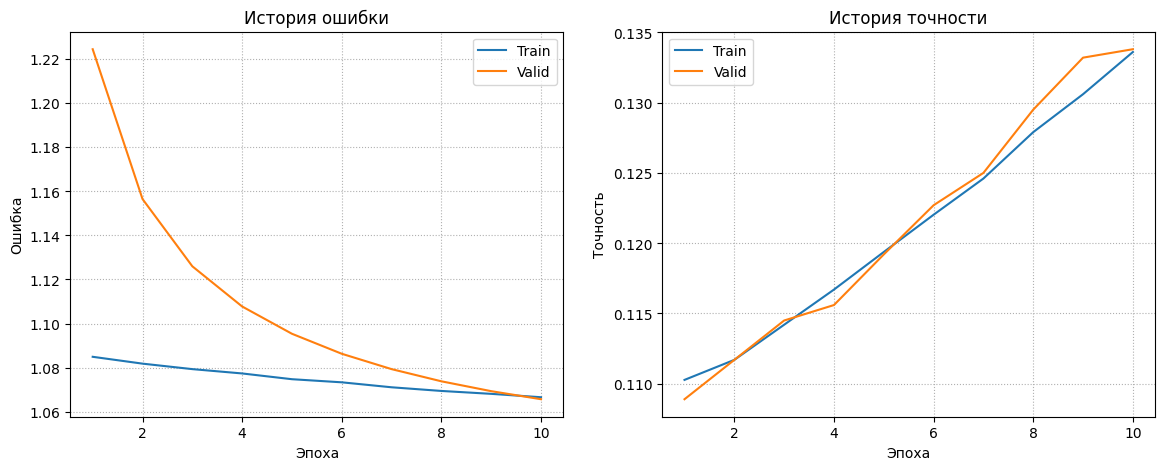

In [195]:
viz_utils.plot_learning_curves(train_loss_history, valid_loss_history,
                                train_acc_history, valid_acc_history)

In [196]:
test_dataloader = Dataloader(test_data, len(test_data), False)
model.eval()
for vecs, labels in test_dataloader:
    out = model.forward(vecs)

    loss = hinge_loss(out, labels)
    test_loss = loss.item()

    pred_labels = np.argmax(out.array, axis=-1)
    test_acc = np.sum(pred_labels == labels) / len(labels)

print(f"Ошибка на тесте: {test_loss:.4f}")
print(f"Точность на тесте: {test_acc:.4f}")

Ошибка на тесте: 1.0650
Точность на тесте: 0.1306


In [197]:
print(classification_report(labels, pred_labels))

              precision    recall  f1-score   support

           0       0.21      0.31      0.25      1000
           1       0.12      0.21      0.16      1000
           2       0.10      0.11      0.11      1000
           3       0.11      0.14      0.13      1000
           4       0.14      0.08      0.11      1000
           5       0.12      0.04      0.06      1000
           6       0.08      0.03      0.04      1000
           7       0.13      0.13      0.13      1000
           8       0.07      0.06      0.06      1000
           9       0.13      0.20      0.16      1000

    accuracy                           0.13     10000
   macro avg       0.12      0.13      0.12     10000
weighted avg       0.12      0.13      0.12     10000



#### Conclusion
Можно заметить, что чем меньше размер батча, тем лучше метрика на тесте. Возможно можно найти нижнию границу размера батча, при 
которой метрика будет еще выше

### Эксперимент 10 Эксперимент с регуляризацией

Добавьте в процесс обучения L1/L2 регуляризацию. Повлияло ли это на качесвто? Выведите норму весов без регуляризации и с. 

#### No regularization

In [11]:
from training.train import train

In [72]:
np.random.seed(42)
model = Sequential(
    Linear(3072, 768),
    ReLU(),
    Dropout(p=0.1),
    Linear(768, 64),
    BatchNorm(64),
    ReLU(),
    Linear(64, 10)
)
model

Sequential(
	Linear(3072, 768, bias=True),
	ReLU(),
	Dropout(p=0.1),
	Linear(768, 64, bias=True),
	BatchNorm(in_dim=64, eps=1e-05),
	ReLU(),
	Linear(64, 10, bias=True)
)

In [73]:
train_loss_history, valid_loss_history, \
train_acc_history, valid_acc_history = train(
    dataset=train_data,
    model=model,
    epochs=10,
    lr=0.5,
    valid_dataset=valid_data,
    batch_size=5000,
    optim_method="Adam")

|Epoch|Train loss|Train acc|Valid loss|Valid acc|  Grad/W  | Time, s  | Total, s |
|=====|==========|=========|==========|=========|==========|==========|==========|
| 1/10|  1.1076  | 0.1052  |  1.1112  | 0.1049  | 1.891459 |   10.8   |   10.8   |
| 2/10|  1.0830  | 0.1259  |  1.0763  | 0.1260  | 0.995045 |   10.7   |   21.4   |
| 3/10|  1.0697  | 0.1461  |  1.0624  | 0.1452  | 0.569662 |   10.5   |   32.0   |
| 4/10|  1.0610  | 0.1641  |  1.0551  | 0.1607  | 0.456847 |   10.5   |   42.5   |
| 5/10|  1.0555  | 0.1769  |  1.0502  | 0.1701  | 0.253037 |   10.6   |   53.1   |
| 6/10|  1.0511  | 0.1858  |  1.0464  | 0.1794  | 0.263908 |   11.3   |   64.4   |
| 7/10|  1.0479  | 0.1942  |  1.0432  | 0.1865  | 0.207759 |   11.3   |   75.6   |
| 8/10|  1.0449  | 0.2019  |  1.0406  | 0.1942  | 0.209647 |   12.5   |   88.1   |
| 9/10|  1.0424  | 0.2070  |  1.0383  | 0.2007  | 0.187512 |   11.2   |   99.3   |
|10/10|  1.0405  | 0.2134  |  1.0363  | 0.2055  | 0.193814 |   10.7   |  110.0   |


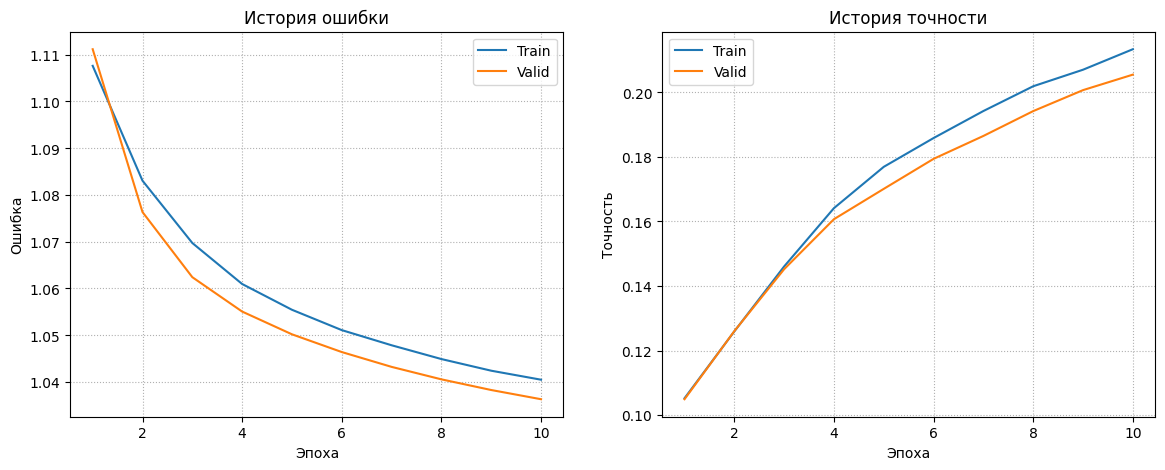

In [74]:
viz_utils.plot_learning_curves(train_loss_history, valid_loss_history,
                                train_acc_history, valid_acc_history)

In [75]:
test_dataloader = Dataloader(test_data, len(test_data), False)
model.eval()
for vecs, labels in test_dataloader:
    out = model.forward(vecs)

    loss = hinge_loss(out, labels)
    test_loss = loss.item()

    pred_labels = np.argmax(out.array, axis=-1)
    test_acc = np.sum(pred_labels == labels) / len(labels)

print(f"Ошибка на тесте: {test_loss:.4f}")
print(f"Точность на тесте: {test_acc:.4f}")

Ошибка на тесте: 1.0355
Точность на тесте: 0.2119


In [76]:
print(classification_report(labels, pred_labels))

              precision    recall  f1-score   support

           0       0.29      0.40      0.34      1000
           1       0.20      0.20      0.20      1000
           2       0.13      0.10      0.12      1000
           3       0.15      0.11      0.13      1000
           4       0.19      0.17      0.18      1000
           5       0.16      0.18      0.17      1000
           6       0.18      0.20      0.19      1000
           7       0.21      0.15      0.18      1000
           8       0.28      0.30      0.29      1000
           9       0.26      0.30      0.28      1000

    accuracy                           0.21     10000
   macro avg       0.21      0.21      0.21     10000
weighted avg       0.21      0.21      0.21     10000



#### L1 regularization

In [31]:
np.random.seed(42)
def norm(model):
    num_params = 0
    result = 0
    for param in model.parameters():
        flat_param = param.params.flatten()
        result = result + np.linalg.norm(flat_param)
        num_params = num_params + 1
    result /= num_params
    return result

In [80]:
modell1 = Sequential(
    Linear(3072, 768),
    ReLU(),
    Dropout(p=0.1),
    Linear(768, 64),
    BatchNorm(64),
    ReLU(),
    Linear(64, 10)
)
modell1

Sequential(
	Linear(3072, 768, bias=True),
	ReLU(),
	Dropout(p=0.1),
	Linear(768, 64, bias=True),
	BatchNorm(in_dim=64, eps=1e-05),
	ReLU(),
	Linear(64, 10, bias=True)
)

In [81]:
train_loss_history, valid_loss_history, \
train_acc_history, valid_acc_history = train(
    dataset=train_data,
    model=modell1,
    epochs=10,
    lr=0.5,
    valid_dataset=valid_data,
    batch_size=5000,
    optim_method="Adam",
    alpha1=0.01)

|Epoch|Train loss|Train acc|Valid loss|Valid acc|  Grad/W  | Time, s  | Total, s |
|=====|==========|=========|==========|=========|==========|==========|==========|
| 1/10|  1.1064  | 0.1262  |  1.1189  | 0.1302  | 1.128989 |   12.3   |   12.4   |
| 2/10|  1.0821  | 0.1688  |  1.0724  | 0.1730  | 0.547622 |   10.7   |   23.1   |
| 3/10|  1.0687  | 0.1938  |  1.0574  | 0.1882  | 0.390243 |   10.6   |   33.7   |
| 4/10|  1.0607  | 0.2072  |  1.0497  | 0.1995  | 0.367209 |   10.5   |   44.2   |
| 5/10|  1.0554  | 0.2169  |  1.0442  | 0.2089  | 0.389344 |   10.4   |   54.6   |
| 6/10|  1.0504  | 0.2247  |  1.0400  | 0.2192  | 0.370516 |   10.6   |   65.2   |
| 7/10|  1.0464  | 0.2301  |  1.0365  | 0.2247  | 0.367349 |   13.3   |   78.4   |
| 8/10|  1.0431  | 0.2343  |  1.0336  | 0.2276  | 0.374013 |   13.0   |   91.4   |
| 9/10|  1.0403  | 0.2384  |  1.0311  | 0.2314  | 0.364696 |   15.1   |  106.5   |
|10/10|  1.0375  | 0.2417  |  1.0290  | 0.2356  | 0.396284 |   14.0   |  120.5   |


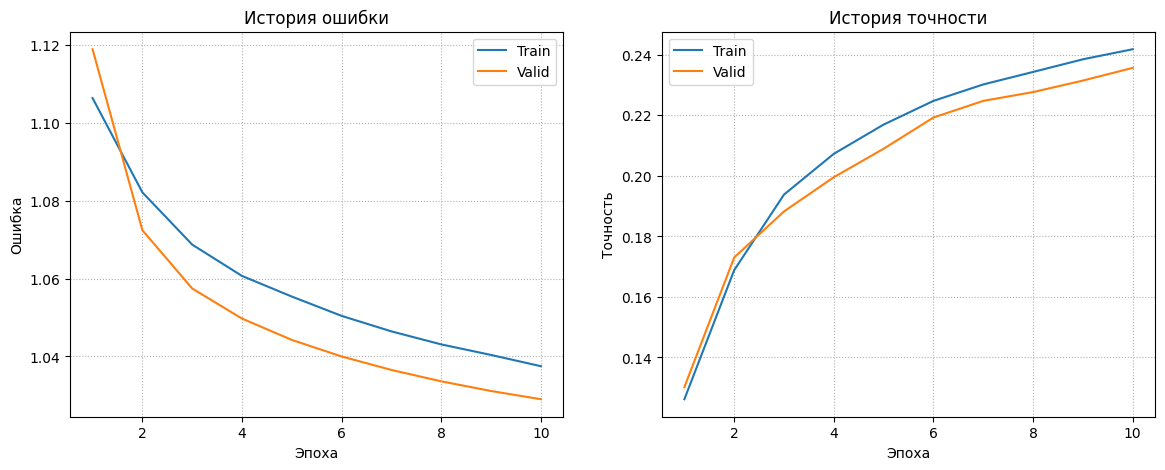

In [82]:
viz_utils.plot_learning_curves(train_loss_history, valid_loss_history,
                                train_acc_history, valid_acc_history)

In [83]:
test_dataloader = Dataloader(test_data, len(test_data), False)
modell1.eval()
for vecs, labels in test_dataloader:
    out = modell1.forward(vecs)

    loss = hinge_loss(out, labels)
    test_loss = loss.item()

    pred_labels = np.argmax(out.array, axis=-1)
    test_acc = np.sum(pred_labels == labels) / len(labels)

print(f"Ошибка на тесте: {test_loss:.4f}")
print(f"Точность на тесте: {test_acc:.4f}")

Ошибка на тесте: 1.0290
Точность на тесте: 0.2345


In [84]:
print(classification_report(labels, pred_labels))

              precision    recall  f1-score   support

           0       0.31      0.33      0.32      1000
           1       0.17      0.15      0.16      1000
           2       0.18      0.27      0.21      1000
           3       0.16      0.12      0.13      1000
           4       0.19      0.18      0.19      1000
           5       0.23      0.21      0.22      1000
           6       0.23      0.22      0.23      1000
           7       0.21      0.16      0.18      1000
           8       0.34      0.44      0.38      1000
           9       0.29      0.27      0.28      1000

    accuracy                           0.23     10000
   macro avg       0.23      0.23      0.23     10000
weighted avg       0.23      0.23      0.23     10000



#### L2 regularization

In [85]:
modell1 = Sequential(
    Linear(3072, 768),
    ReLU(),
    Dropout(p=0.1),
    Linear(768, 64),
    BatchNorm(64),
    ReLU(),
    Linear(64, 10)
)
modell1

Sequential(
	Linear(3072, 768, bias=True),
	ReLU(),
	Dropout(p=0.1),
	Linear(768, 64, bias=True),
	BatchNorm(in_dim=64, eps=1e-05),
	ReLU(),
	Linear(64, 10, bias=True)
)

In [86]:
train_loss_history, valid_loss_history, \
train_acc_history, valid_acc_history = train(
    dataset=train_data,
    model=modell2,
    epochs=10,
    lr=0.5,
    valid_dataset=valid_data,
    batch_size=5000,
    optim_method="Adam",
    alpha2=0.01)

|Epoch|Train loss|Train acc|Valid loss|Valid acc|  Grad/W  | Time, s  | Total, s |
|=====|==========|=========|==========|=========|==========|==========|==========|
| 1/10|  1.1117  | 0.1404  |  1.0815  | 0.1418  | 1.580736 |   14.1   |   14.1   |
| 2/10|  1.0899  | 0.1691  |  1.0702  | 0.1684  | 0.819678 |   12.2   |   26.4   |
| 3/10|  1.0765  | 0.1860  |  1.0615  | 0.1851  | 0.449617 |   10.7   |   37.1   |
| 4/10|  1.0680  | 0.1979  |  1.0549  | 0.1966  | 0.301737 |   10.8   |   47.9   |
| 5/10|  1.0618  | 0.2060  |  1.0498  | 0.2061  | 0.344862 |   10.6   |   58.5   |
| 6/10|  1.0569  | 0.2150  |  1.0456  | 0.2147  | 0.282059 |   11.0   |   69.5   |
| 7/10|  1.0528  | 0.2224  |  1.0420  | 0.2222  | 0.209650 |   10.4   |   79.9   |
| 8/10|  1.0497  | 0.2292  |  1.0391  | 0.2294  | 0.189479 |   11.0   |   91.0   |
| 9/10|  1.0467  | 0.2348  |  1.0366  | 0.2344  | 0.177071 |   10.5   |  101.5   |
|10/10|  1.0441  | 0.2412  |  1.0345  | 0.2389  | 0.156156 |   10.4   |  111.9   |


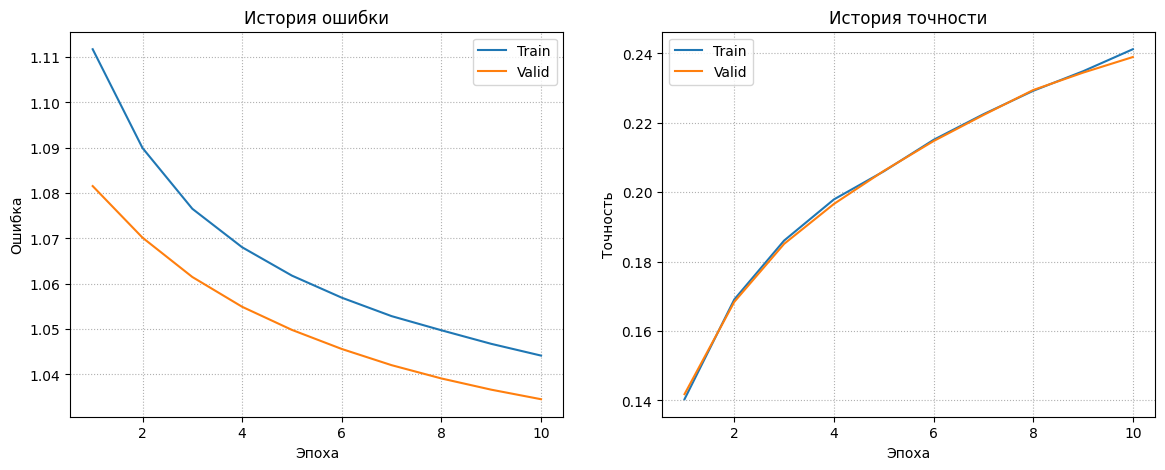

In [87]:
viz_utils.plot_learning_curves(train_loss_history, valid_loss_history,
                                train_acc_history, valid_acc_history)

In [88]:
test_dataloader = Dataloader(test_data, len(test_data), False)
modell2.eval()
for vecs, labels in test_dataloader:
    out = modell2.forward(vecs)

    loss = hinge_loss(out, labels)
    test_loss = loss.item()

    pred_labels = np.argmax(out.array, axis=-1)
    test_acc = np.sum(pred_labels == labels) / len(labels)

print(f"Ошибка на тесте: {test_loss:.4f}")
print(f"Точность на тесте: {test_acc:.4f}")

Ошибка на тесте: 1.0326
Точность на тесте: 0.2491


In [89]:
print(classification_report(labels, pred_labels))

              precision    recall  f1-score   support

           0       0.33      0.37      0.35      1000
           1       0.22      0.16      0.18      1000
           2       0.18      0.14      0.16      1000
           3       0.18      0.13      0.15      1000
           4       0.17      0.20      0.19      1000
           5       0.23      0.19      0.21      1000
           6       0.26      0.31      0.28      1000
           7       0.18      0.20      0.19      1000
           8       0.36      0.43      0.39      1000
           9       0.31      0.37      0.34      1000

    accuracy                           0.25     10000
   macro avg       0.24      0.25      0.24     10000
weighted avg       0.24      0.25      0.24     10000



#### Elastic regularization

In [96]:
modell12 = Sequential(
    Linear(3072, 768),
    ReLU(),
    Dropout(p=0.2),
    Linear(768, 64),
    BatchNorm(64),
    ReLU(),
    Linear(64, 10)
)
modell12

Sequential(
	Linear(3072, 768, bias=True),
	ReLU(),
	Dropout(p=0.2),
	Linear(768, 64, bias=True),
	BatchNorm(in_dim=64, eps=1e-05),
	ReLU(),
	Linear(64, 10, bias=True)
)

In [105]:
train_loss_history, valid_loss_history, \
train_acc_history, valid_acc_history = train(
    dataset=train_data,
    model=model,
    epochs=10,
    lr=0.5,
    valid_dataset=valid_data,
    batch_size=5000,
    optim_method="Adam",
    alpha2=0.01,
    alpha1=0.01)

|Epoch|Train loss|Train acc|Valid loss|Valid acc|  Grad/W  | Time, s  | Total, s |
|=====|==========|=========|==========|=========|==========|==========|==========|
| 1/10|  1.0154  | 0.0824  |  1.0349  | 0.0809  | 0.876648 |   14.6   |   14.7   |
| 2/10|  1.0132  | 0.2139  |  1.0067  | 0.2081  | 0.499844 |   11.3   |   26.0   |
| 3/10|  1.0163  | 0.2470  |  1.0059  | 0.2448  | 0.635243 |   13.4   |   39.4   |
| 4/10|  1.0104  | 0.2187  |  1.0067  | 0.2136  | 0.939259 |   19.9   |   59.3   |
| 5/10|  1.0103  | 0.2084  |  1.0064  | 0.2081  | 1.070735 |   19.0   |   78.3   |
| 6/10|  1.0095  | 0.2074  |  1.0061  | 0.2062  | 1.098114 |   12.5   |   90.8   |
| 7/10|  1.0087  | 0.2012  |  1.0058  | 0.1991  | 1.158554 |   14.0   |  104.8   |
| 8/10|  1.0079  | 0.2036  |  1.0053  | 0.2031  | 1.404447 |   14.2   |  118.9   |
| 9/10|  1.0072  | 0.2013  |  1.0049  | 0.1996  | 1.440918 |   13.6   |  132.5   |
|10/10|  1.0064  | 0.2060  |  1.0043  | 0.2069  | 1.348414 |   11.4   |  143.9   |


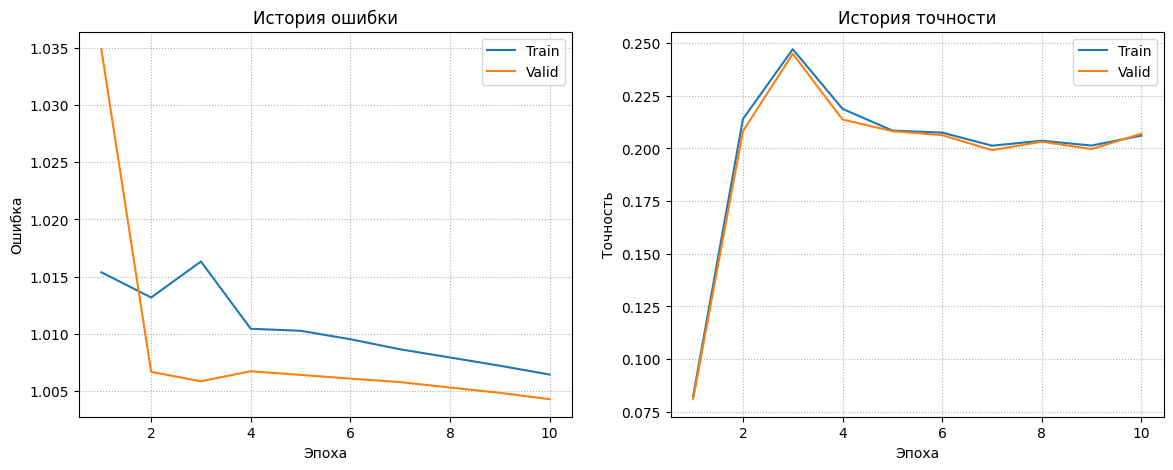

In [106]:
viz_utils.plot_learning_curves(train_loss_history, valid_loss_history,
                                train_acc_history, valid_acc_history)

In [107]:
test_dataloader = Dataloader(test_data, len(test_data), False)
modell12.eval()
for vecs, labels in test_dataloader:
    out = modell12.forward(vecs)

    loss = hinge_loss(out, labels)
    test_loss = loss.item()

    pred_labels = np.argmax(out.array, axis=-1)
    test_acc = np.sum(pred_labels == labels) / len(labels)

print(f"Ошибка на тесте: {test_loss:.4f}")
print(f"Точность на тесте: {test_acc:.4f}")

Ошибка на тесте: 24.6345
Точность на тесте: 0.1100


In [108]:
print(classification_report(labels, pred_labels))

              precision    recall  f1-score   support

           0       0.16      0.25      0.19      1000
           1       0.08      0.03      0.04      1000
           2       0.09      0.02      0.04      1000
           3       0.09      0.02      0.03      1000
           4       0.09      0.05      0.06      1000
           5       0.10      0.56      0.17      1000
           6       0.12      0.15      0.13      1000
           7       0.08      0.02      0.03      1000
           8       0.00      0.00      0.00      1000
           9       0.50      0.00      0.00      1000

    accuracy                           0.11     10000
   macro avg       0.13      0.11      0.07     10000
weighted avg       0.13      0.11      0.07     10000



Посмотрим на норму весов моделей

In [95]:
print("No: ", norm(model))
print("L1: ", norm(modell1))
print("L2: ", norm(modell2))
print("Elastic: ", norm(modell12))

No:  2.1966332076389357
L1:  3.635074114024915
L2:  3.5837853899918586
Elastic:  3.630163324743989


#### Conclusion
Как видно из результатов, лучше по метрике оказалась L2 регуляризация. Регуляризация по elastic оказалась только ухудшает положение

### Эксперимент 11 Финальная архитектура

Как выглядит ваша финальная модель?

Наилучшая по accuracy на тестовом сэмпле показала модель со следующими параметрами:
* ReLU
* BatchNorm
* Dropout()
* Batchsize = 5000
* L2 regularization
* 3 слоя
* Learning rate = .5
* Adam

In [31]:
np.random.seed(42)

In [32]:
model = Sequential(
    Linear(3072, 768),
    ReLU(),
    Dropout(p=0.2),
    Linear(768, 64),
    BatchNorm(64),
    ReLU(),
    Linear(64, 10)
)
model

Sequential(
	Linear(3072, 768, bias=True),
	ReLU(),
	Dropout(p=0.2),
	Linear(768, 64, bias=True),
	BatchNorm(in_dim=64, eps=1e-05),
	ReLU(),
	Linear(64, 10, bias=True)
)

In [33]:
train_loss_history, valid_loss_history, \
train_acc_history, valid_acc_history = train(
    dataset=train_data,
    model=model,
    epochs=10,
    lr=0.5,
    valid_dataset=valid_data,
    batch_size=1000,
    optim_method="Adam",
    alpha2=0.01)

|Epoch|Train loss|Train acc|Valid loss|Valid acc|  Grad/W  | Time, s  | Total, s |
|=====|==========|=========|==========|=========|==========|==========|==========|
| 1/10|  1.0783  | 0.1729  |  1.0480  | 0.1685  | 0.317934 |   14.1   |   14.1   |
| 2/10|  1.0484  | 0.2091  |  1.0344  | 0.2029  | 0.214753 |   14.4   |   28.5   |
| 3/10|  1.0375  | 0.2306  |  1.0275  | 0.2230  | 0.229268 |   14.3   |   42.8   |
| 4/10|  1.0307  | 0.2430  |  1.0229  | 0.2331  | 0.173287 |   13.7   |   56.6   |
| 5/10|  1.0259  | 0.2520  |  1.0194  | 0.2415  | 0.203630 |   16.2   |   72.8   |
| 6/10|  1.0223  | 0.2573  |  1.0169  | 0.2475  | 0.173872 |   22.6   |   95.4   |
| 7/10|  1.0196  | 0.2646  |  1.0149  | 0.2540  | 0.157319 |   20.1   |  115.5   |
| 8/10|  1.0176  | 0.2690  |  1.0133  | 0.2553  | 0.154332 |   29.7   |  145.2   |
| 9/10|  1.0156  | 0.2710  |  1.0119  | 0.2587  | 0.195825 |   24.8   |  170.0   |
|10/10|  1.0143  | 0.2746  |  1.0107  | 0.2602  | 0.168175 |   19.1   |  189.2   |


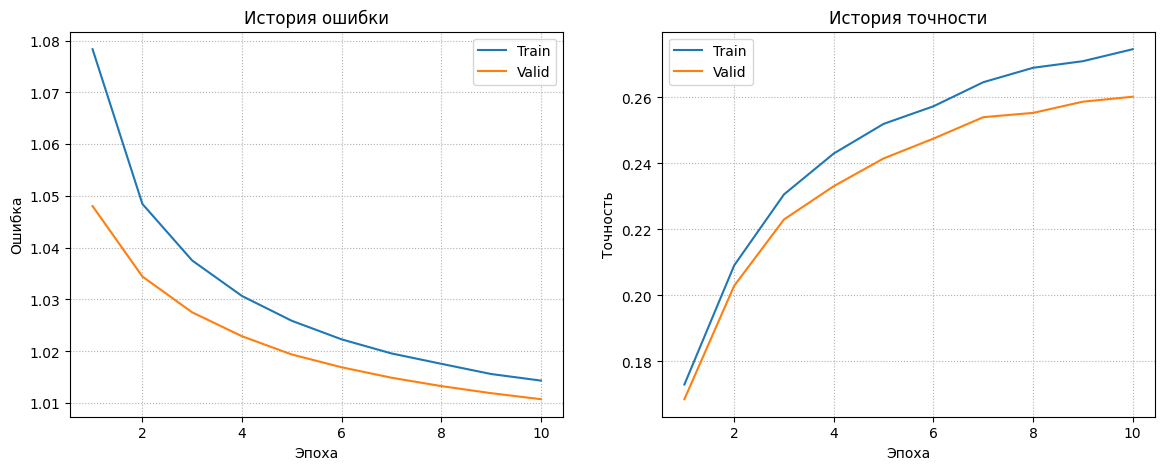

In [34]:
viz_utils.plot_learning_curves(train_loss_history, valid_loss_history,
                                train_acc_history, valid_acc_history)

In [35]:
test_dataloader = Dataloader(test_data, len(test_data), False)
model.eval()
for vecs, labels in test_dataloader:
    out = model.forward(vecs)

    loss = hinge_loss(out, labels)
    test_loss = loss.item()

    pred_labels = np.argmax(out.array, axis=-1)
    test_acc = np.sum(pred_labels == labels) / len(labels)

print(f"Ошибка на тесте: {test_loss:.4f}")
print(f"Точность на тесте: {test_acc:.4f}")

Ошибка на тесте: 1.0102
Точность на тесте: 0.2723


In [36]:
print(classification_report(labels, pred_labels))

              precision    recall  f1-score   support

           0       0.34      0.43      0.38      1000
           1       0.29      0.27      0.28      1000
           2       0.17      0.12      0.14      1000
           3       0.17      0.12      0.14      1000
           4       0.23      0.24      0.24      1000
           5       0.22      0.26      0.24      1000
           6       0.24      0.28      0.26      1000
           7       0.28      0.15      0.20      1000
           8       0.37      0.47      0.41      1000
           9       0.33      0.37      0.35      1000

    accuracy                           0.27     10000
   macro avg       0.26      0.27      0.26     10000
weighted avg       0.26      0.27      0.26     10000

